In [2]:
!pip install torch==2.0.0 torchvision==0.15.1
!pip install -U openmim
!mim install "mmengine>=0.7.1,<1.1.0"
!mim install "mmcv>=2.0.0rc4,<2.1.0"
!mim install "mmdet>=3.0.0rc5,<3.2.0"
!mim install mmocr
!pip install OpenCV-python
!pip install pillow
!pip install pyspellchecker
!pip install editdistance
!pip install deskew

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 8.9 MB/s eta 0:00:000:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 2.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 95.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 47.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 9.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 21.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 3.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 MB 5.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━

In [3]:
!git clone https://github.com/open-mmlab/mmocr.git
%cd mmocr
!pip install -v -e 

Cloning into 'mmocr'...
remote: Enumerating objects: 16394, done.
remote: Counting objects: 100% (303/303), done.
remote: Compressing objects: 100% (229/229), done.
remote: Total 16394 (delta 106), reused 201 (delta 71), pack-reused 16091
Receiving objects: 100% (16394/16394), 16.24 MiB | 13.13 MiB/s, done.
Resolving deltas: 100% (10774/10774), done.
/kaggle/working/mmocr

Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

-e option requires 1 argument


In [4]:
import cv2
from PIL import Image, ImageDraw
import numpy as np
import os
import csv
import pandas as pd
import numpy as np
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
import requests
import torch
from spellchecker import SpellChecker
import pandas as pd
import editdistance
from PIL import Image, ImageDraw
from PIL import Image, ImageDraw, ImageOps
from deskew import determine_skew
from mmocr.apis import MMOCRInferencer
from skimage.transform import rotate
from skimage import io
from skimage.color import rgb2gray
from skimage.transform import rotate
import math
from typing import Tuple, Union
from skimage.color import rgba2rgb, rgb2gray

/opt/conda/lib/python3.10/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (2.1.0) or chardet (None)/charset_normalizer (3.3.2) doesn't match a supported version!
  warnings.warn(


In [5]:
infer = MMOCRInferencer(det='TextSnake')
result = infer('/kaggle/input/images-30/ocr16.jpg', return_vis=True)

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmocr/textdet/textsnake/textsnake_resnet50-oclip_fpn-unet_1200e_ctw1500/textsnake_resnet50-oclip_fpn-unet_1200e_ctw1500_20221101_134814-a216e5b2.pth


Downloading: "https://download.openmmlab.com/mmocr/textdet/textsnake/textsnake_resnet50-oclip_fpn-unet_1200e_ctw1500/textsnake_resnet50-oclip_fpn-unet_1200e_ctw1500_20221101_134814-a216e5b2.pth" to /root/.cache/torch/hub/checkpoints/textsnake_resnet50-oclip_fpn-unet_1200e_ctw1500_20221101_134814-a216e5b2.pth


06/25 13:42:24 - mmengine - WARNING - Failed to search registry with scope "mmocr" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmocr" is a correct scope, or whether the registry is initialized.


Output()

/opt/conda/lib/python3.10/site-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


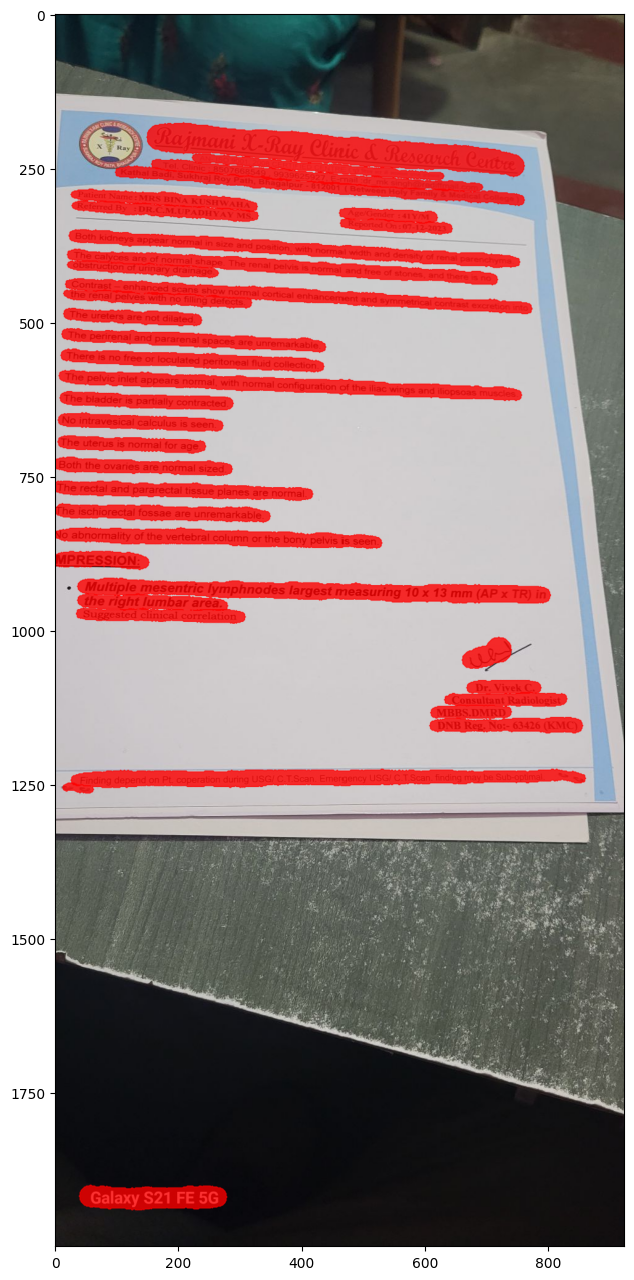

In [6]:
# Visualize the results
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 16))
plt.imshow(result['visualization'][0])
plt.show()

# Creating a word dictionary for image classification

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [8]:
processor = TrOCRProcessor.from_pretrained('microsoft/trocr-large-printed')
model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-large-printed')
model.to(device)

2024-06-25 13:42:29.977616: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-25 13:42:29.977722: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-25 13:42:30.099953: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


preprocessor_config.json:   0%|          | 0.00/224 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.43G [00:00<?, ?B/s]

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-printed and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

VisionEncoderDecoderModel(
  (encoder): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 1024, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-23): 24 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=False)
              (key): Linear(in_features=1024, out_features=1024, bias=False)
              (value): Linear(in_features=1024, out_features=1024, bias=False)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Line

In [9]:
def generate_text_from_image(image):
    
    image = image.convert("RGB")
    pixel_values = processor(images=image, return_tensors="pt").pixel_values.to(device)
    generated_ids = model.generate(pixel_values)
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    
    return generated_text

In [10]:
def spell_check(text):
    spell = SpellChecker()
    corrected_text = []
    words = text.split()
    for word in words:
        corrected_word = spell.correction(word)
        if corrected_word is None:
            corrected_text.append(word) 
        else:
            corrected_text.append(corrected_word)
    return ' '.join(corrected_text)

In [11]:
def get_word_dict(img_path):
    infer = MMOCRInferencer(det='TextSnake')
    result = infer(img_path, return_vis=True)
    
    word_dict = {}
    
    for itr in range(len(result['predictions'][0]['det_polygons'])):
        polygon_vertices = result['predictions'][0]['det_polygons'][itr]
        polygon_vertices = [(polygon_vertices[i], polygon_vertices[i + 1]) for i in range(0, len(polygon_vertices), 2)]

        image_path = img_path
        image = Image.open(image_path)

        min_x = min(vertex[0] for vertex in polygon_vertices)
        max_x = max(vertex[0] for vertex in polygon_vertices)
        min_y = min(vertex[1] for vertex in polygon_vertices)
        max_y = max(vertex[1] for vertex in polygon_vertices)
        bounding_box = (min_x, min_y, max_x, max_y)

        cropped_image = image.crop(bounding_box)

        desired_width = int(max_x - min_x)
        desired_height = int(max_y - min_y)
        cropped_image = cropped_image.resize((desired_width, desired_height), Image.ANTIALIAS)
        
        text = generate_text_from_image(cropped_image)
        corrected_text = spell_check(text)
        
        words = corrected_text.split()
        for word in words:
            if word in word_dict:
                word_dict[word] += 1
            else:
                word_dict[word] = 1
    return word_dict

In [12]:
img_path = '/kaggle/input/images-7/ocr6.jpg'
word_dictionary = get_word_dict(img_path)
print("Word Dictionary:", word_dictionary)

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmocr/textdet/textsnake/textsnake_resnet50-oclip_fpn-unet_1200e_ctw1500/textsnake_resnet50-oclip_fpn-unet_1200e_ctw1500_20221101_134814-a216e5b2.pth


Output()

/opt/conda/lib/python3.10/site-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


/tmp/ipykernel_34/980690786.py:24: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  cropped_image = cropped_image.resize((desired_width, desired_height), Image.ANTIALIAS)
/opt/conda/lib/python3.10/site-packages/transformers/generation/utils.py:1168: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
/tmp/ipykernel_34/980690786.py:24: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  cropped_image = cropped_image.resize((desired_width, desired_height), Image.ANTIALIAS)


KeyboardInterrupt: 

# ocr-ed Text to image

In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [14]:
processor = TrOCRProcessor.from_pretrained('microsoft/trocr-large-printed')
model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-large-printed')
model.to(device)

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-printed and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


VisionEncoderDecoderModel(
  (encoder): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 1024, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-23): 24 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=False)
              (key): Linear(in_features=1024, out_features=1024, bias=False)
              (value): Linear(in_features=1024, out_features=1024, bias=False)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Line

In [15]:
def generate_text_from_image(image):
    
    image = image.convert("RGB")
    pixel_values = processor(images=image, return_tensors="pt").pixel_values.to(device)
    generated_ids = model.generate(pixel_values)
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    
    return generated_text

In [16]:
def spell_check(text):
    spell = SpellChecker()
    corrected_text = []
    words = text.split()
    for word in words:
        corrected_word = spell.correction(word)
        if corrected_word is None:
            corrected_text.append(word) 
        else:
            corrected_text.append(corrected_word)
    return ' '.join(corrected_text)

In [17]:
def deskew(image):
    if image.shape[2] == 4:
        image = rgba2rgb(image)
    
    grayscale = rgb2gray(image)
    angle = determine_skew(grayscale)
    rotated = rotate(image, angle, resize=True) * 255
    return rotated.astype(np.uint8)

In [30]:
def get_ocr_image(img_path):
    infer = MMOCRInferencer(det='TextSnake')
    result = infer(img_path, return_vis=True)
    
    image = Image.open(img_path).convert("RGBA")
    draw = ImageDraw.Draw(image)
    
    for itr in range(len(result['predictions'][0]['det_polygons'])):
        polygon_vertices = result['predictions'][0]['det_polygons'][itr]
        polygon_vertices = [(polygon_vertices[i], polygon_vertices[i + 1]) for i in range(0, len(polygon_vertices), 2)]

        min_x = min(vertex[0] for vertex in polygon_vertices)
        max_x = max(vertex[0] for vertex in polygon_vertices)
        min_y = min(vertex[1] for vertex in polygon_vertices)
        max_y = max(vertex[1] for vertex in polygon_vertices)
        
        bounding_box = (min_x, min_y, max_x, max_y)

        cropped_image = image.crop(bounding_box)
#         cropped_image = numpy_array = np.asarray(cropped_image)
#         cropped_image = deskew(cropped_image)
#         cropped_image = Image.fromarray(cropped_image)
        
    
#         # Plot the cropped image using matplotlib
#         cropped_image = cropped_image.convert('RGBA')
#         plt.figure()
#         plt.imshow(cropped_image)
#         plt.axis('off')
#         plt.title('Cropped Image')
#         plt.show()

        
        text = generate_text_from_image(cropped_image)
#         corrected_text = spell_check(text)
        corrected_text = text
        
        draw_position = (bounding_box[0], bounding_box[1])
        
        draw.text(draw_position, corrected_text, fill=(255, 0, 0, 255)) 
        
    del draw     
    return image


In [31]:
img_path = '/kaggle/input/fhowfdf/prepro.jpg'
img_from_ocr = get_ocr_image(img_path)

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmocr/textdet/textsnake/textsnake_resnet50-oclip_fpn-unet_1200e_ctw1500/textsnake_resnet50-oclip_fpn-unet_1200e_ctw1500_20221101_134814-a216e5b2.pth


Output()

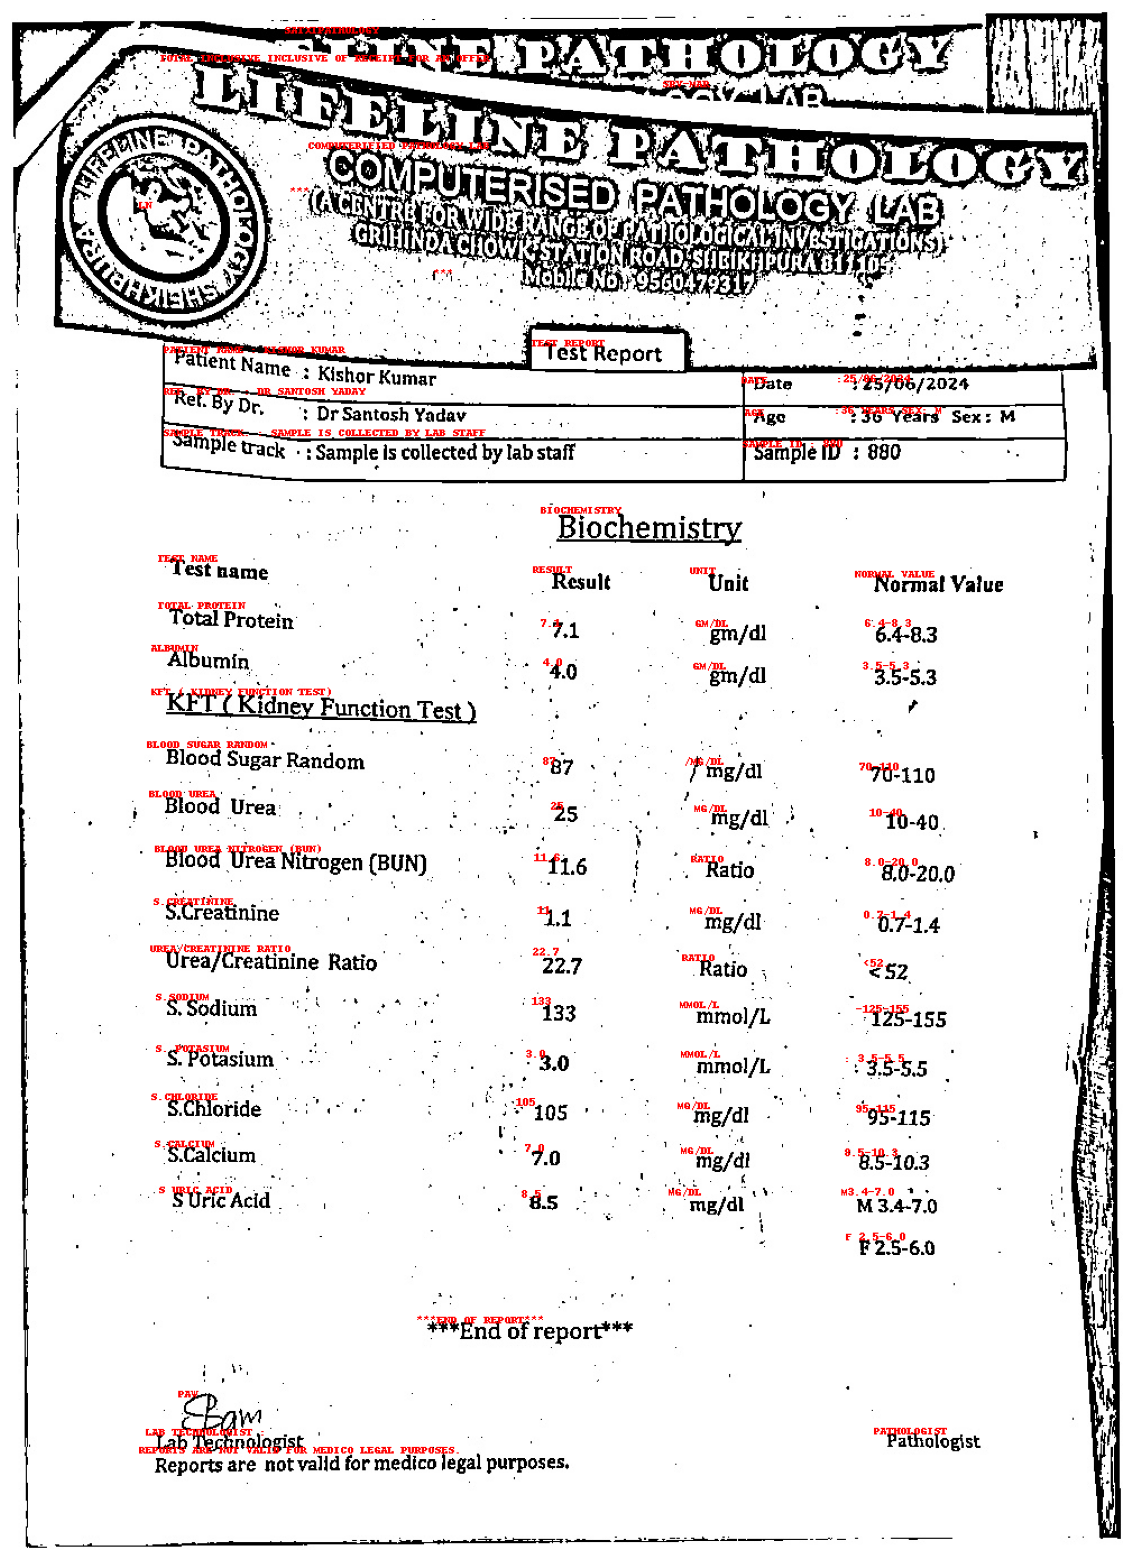

In [32]:
plt.figure(figsize=(40, 20)) 
plt.imshow(img_from_ocr)
plt.axis('off')
plt.show()

In [33]:
img_from_ocr.save('img_from_ocr.png')

# Summarising Report

# Calculating cer metric

In [8]:
len(result['predictions'][0]['det_polygons'])

139

In [9]:
len(result['predictions'][0]['det_polygons'][6])

74

In [10]:
csv_file_path = "image_path_data.csv"
fieldnames = ["img_path", "text"]

with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=fieldnames)
    writer.writeheader()

In [11]:
df = pd.read_csv(csv_file_path)
img_path_list = []

In [12]:
def add_data(result, img_path, name,df, image_path_list):
    folder_name = name
    os.makedirs(folder_name, exist_ok=True)

    for itr in range(len(result['predictions'][0]['det_polygons'])):
        polygon_vertices = result['predictions'][0]['det_polygons'][itr]
        polygon_vertices = [(polygon_vertices[i], polygon_vertices[i + 1]) for i in range(0, len(polygon_vertices), 2)]

        image_path = img_path
        image = Image.open(image_path)

        min_x = min(vertex[0] for vertex in polygon_vertices)
        max_x = max(vertex[0] for vertex in polygon_vertices)
        min_y = min(vertex[1] for vertex in polygon_vertices)
        max_y = max(vertex[1] for vertex in polygon_vertices)
        bounding_box = (min_x, min_y, max_x, max_y)

        cropped_image = image.crop(bounding_box)

        desired_width = int(max_x - min_x)
        desired_height = int(max_y - min_y)
        cropped_image = cropped_image.resize((desired_width, desired_height), Image.ANTIALIAS)
        # Save cropped image
        cropped_image_path = f"{folder_name}/cropped_image_{itr+1}.jpg"
        cropped_image.save(cropped_image_path)
        image_path_list.append(cropped_image_path)


In [13]:
for i in range(7):
    img_path = f'/kaggle/input/images-7/ocr{i+1}.jpg'
    name = f'Cropped_images_ocr{i+1}'
    infer = MMOCRInferencer(det='TextSnake')
    result = infer(img_path, return_vis=True)
    add_data(result, img_path, name, df, img_path_list)
    

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmocr/textdet/textsnake/textsnake_resnet50-oclip_fpn-unet_1200e_ctw1500/textsnake_resnet50-oclip_fpn-unet_1200e_ctw1500_20221101_134814-a216e5b2.pth


Output()

/opt/conda/lib/python3.10/site-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


/tmp/ipykernel_34/333349943.py:22: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  cropped_image = cropped_image.resize((desired_width, desired_height), Image.ANTIALIAS)


Loads checkpoint by http backend from path: https://download.openmmlab.com/mmocr/textdet/textsnake/textsnake_resnet50-oclip_fpn-unet_1200e_ctw1500/textsnake_resnet50-oclip_fpn-unet_1200e_ctw1500_20221101_134814-a216e5b2.pth


Output()

/opt/conda/lib/python3.10/site-packages/mmengine/visualization/visualizer.py:831: UserWarning: Warning: The polygon
is out of bounds, the drawn polygon may not be in the image
  warnings.warn(

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmocr/textdet/textsnake/textsnake_resnet50-oclip_fpn-unet_1200e_ctw1500/textsnake_resnet50-oclip_fpn-unet_1200e_ctw1500_20221101_134814-a216e5b2.pth


Output()

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmocr/textdet/textsnake/textsnake_resnet50-oclip_fpn-unet_1200e_ctw1500/textsnake_resnet50-oclip_fpn-unet_1200e_ctw1500_20221101_134814-a216e5b2.pth


Output()

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmocr/textdet/textsnake/textsnake_resnet50-oclip_fpn-unet_1200e_ctw1500/textsnake_resnet50-oclip_fpn-unet_1200e_ctw1500_20221101_134814-a216e5b2.pth


Output()

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmocr/textdet/textsnake/textsnake_resnet50-oclip_fpn-unet_1200e_ctw1500/textsnake_resnet50-oclip_fpn-unet_1200e_ctw1500_20221101_134814-a216e5b2.pth


Output()

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmocr/textdet/textsnake/textsnake_resnet50-oclip_fpn-unet_1200e_ctw1500/textsnake_resnet50-oclip_fpn-unet_1200e_ctw1500_20221101_134814-a216e5b2.pth


Output()

In [14]:
df['img_path'] = img_path_list

In [16]:
df

img_path text
0     Cropped_images_ocr1/cropped_image_1.jpg  NaN
1     Cropped_images_ocr1/cropped_image_2.jpg  NaN
2     Cropped_images_ocr1/cropped_image_3.jpg  NaN
3     Cropped_images_ocr1/cropped_image_4.jpg  NaN
4     Cropped_images_ocr1/cropped_image_5.jpg  NaN
..                                        ...  ...
496  Cropped_images_ocr7/cropped_image_76.jpg  NaN
497  Cropped_images_ocr7/cropped_image_77.jpg  NaN
498  Cropped_images_ocr7/cropped_image_78.jpg  NaN
499  Cropped_images_ocr7/cropped_image_79.jpg  NaN
500  Cropped_images_ocr7/cropped_image_80.jpg  NaN

[501 rows x 2 columns]

In [20]:
import pandas as pd
import torch
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
import requests

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
processor = TrOCRProcessor.from_pretrained('microsoft/trocr-large-printed')
model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-large-printed')

model.to(device)

for index, row in df.iterrows():
    img_path = row['img_path']
    image = Image.open(img_path).convert("RGB")

    # Process the image
    pixel_values = processor(images=image, return_tensors="pt").pixel_values.to(device)
    
    # Generate text from the image
    generated_ids = model.generate(pixel_values)
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    
    # Add generated text to the DataFrame
    df.at[index, 'text'] = generated_text


cuda


Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-printed and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [22]:
df['actual_text'] = None

In [23]:
df

img_path  \
0     Cropped_images_ocr1/cropped_image_1.jpg   
1     Cropped_images_ocr1/cropped_image_2.jpg   
2     Cropped_images_ocr1/cropped_image_3.jpg   
3     Cropped_images_ocr1/cropped_image_4.jpg   
4     Cropped_images_ocr1/cropped_image_5.jpg   
..                                        ...   
496  Cropped_images_ocr7/cropped_image_76.jpg   
497  Cropped_images_ocr7/cropped_image_77.jpg   
498  Cropped_images_ocr7/cropped_image_78.jpg   
499  Cropped_images_ocr7/cropped_image_79.jpg   
500  Cropped_images_ocr7/cropped_image_80.jpg   

                                                  text actual_text  
0                                                LABLE        None  
1                                         PATROTING IN        None  
2                          : S. WIDAL TEST IS POSITIVE        None  
3                                               RESULT        None  
4                             : AGGLUTINATION NOT SEEN        None  
..                                                 ...         ...  
496  MORE CLOSELY WITH CHINICAL STATUS OF THE PATIE...        None  
497          3. UNBOUND FRACTION (FREE,T4 /FREE,T3) OF        None  
498  TOTAL T4 LEVELS ESPECIATIVE IN PREGNANCY AND I...        None  
499    2. ATERATION IN CONCENTRATION OF THYOID HOMMONE        None  
500                                             ON THE        None  

[501 rows x 3 columns]

In [ ]:
/kaggle/working/mmocr/Cropped_images_ocr1

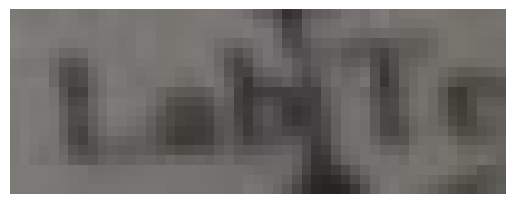

Please enter the text for this image 0:  LabTe


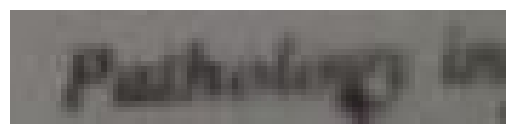

Please enter the text for this image 1:  Pathology


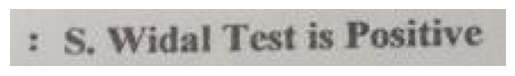

Please enter the text for this image 2:  : S. WIDAL TEST IS POSITIVE


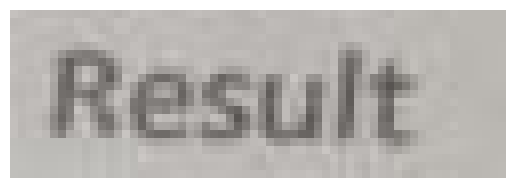

Please enter the text for this image 3:  Result


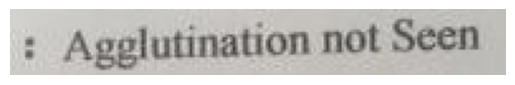

Please enter the text for this image 4:  : AGGLUTINATION NOT SEEN


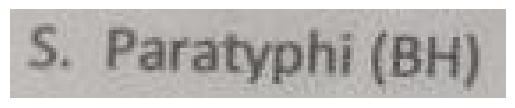

Please enter the text for this image 5:  S. PARATYPHI (BH)


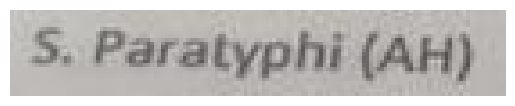

Please enter the text for this image 6:  S. PARATYPHI (AH)


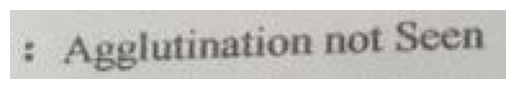

Please enter the text for this image 7:  : AGGLUTINATION NOT SEEN


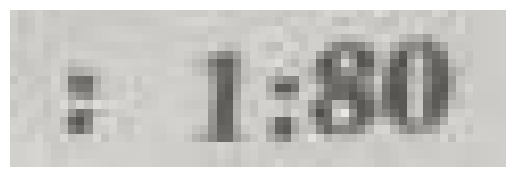

Please enter the text for this image 8:  : 1:80


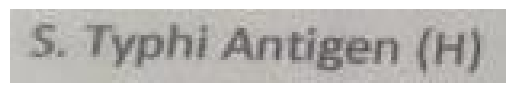

Please enter the text for this image 9:  S. TYPHI ANTIGEN (H)


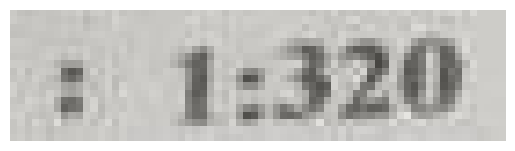

Please enter the text for this image 10:  : 1:320


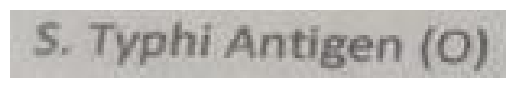

Please enter the text for this image 11:  S. TYPHI ANTIGEN(O)


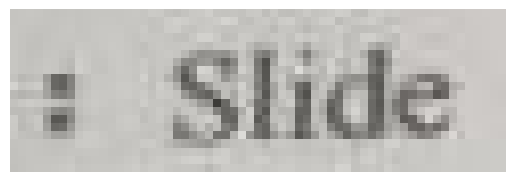

Please enter the text for this image 12:  : SLIDE


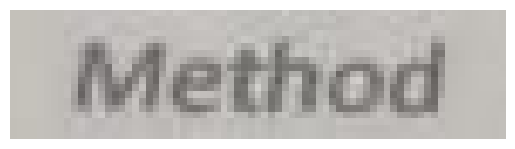

Please enter the text for this image 13:  METHOD


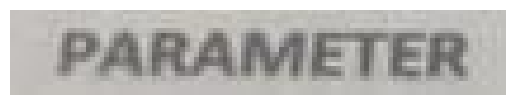

Please enter the text for this image 14:  PARAMETER


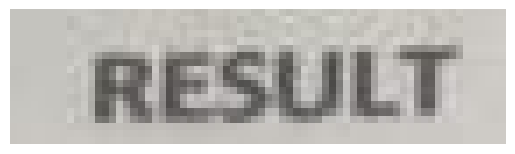

Please enter the text for this image 15:  RESULT


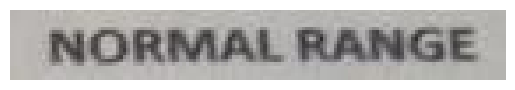

Please enter the text for this image 16:  NORMAL RANGE


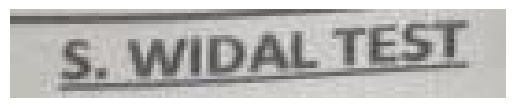

Please enter the text for this image 17:  S. WIDAL TEST


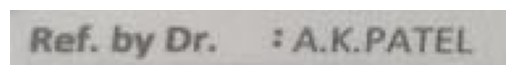

Please enter the text for this image 18:  REF. BY DR. :A.K.PATEL


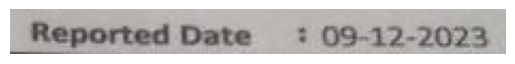

Please enter the text for this image 19:  REPORTED DATE :09-12-2023


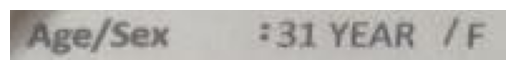

Please enter the text for this image 20:  AGE/SEX : 31 YEAR /F


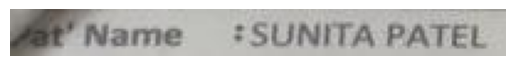

Please enter the text for this image 21:  NAME : SUNITA PATEL


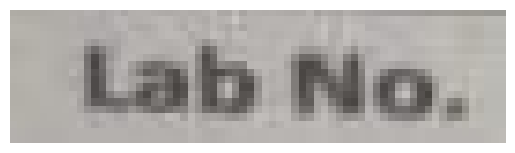

Please enter the text for this image 22:  LAB NO.


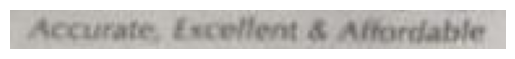

Please enter the text for this image 23:  ACCURATE, EXCELLENT & AFFORDABLE


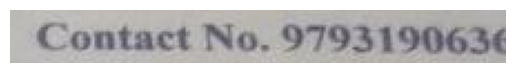

Please enter the text for this image 24:  CONTACT NO. 9793190636


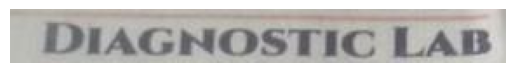

Please enter the text for this image 25:  DIAGNOSTIC LAB


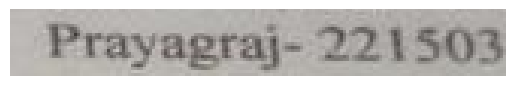

Please enter the text for this image 26:  PRAYAGRAJ-221503


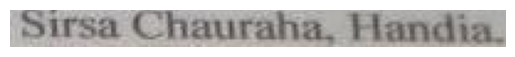

Please enter the text for this image 27:  SIRSA CHAURAHA, HANDIA.


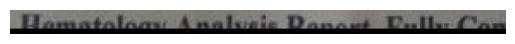

Please enter the text for this image 28:  HAMATOLOGY ANALYSIS RESULT


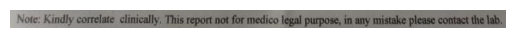

Please enter the text for this image 29:  NOTE. KINDLY CORRELATE CLINICALLY. THIS REPORT NOT FOR MEDICO LEGAL PURPOSE, IN ANY MISTAKE PLEASE CONTACT THE LAB.


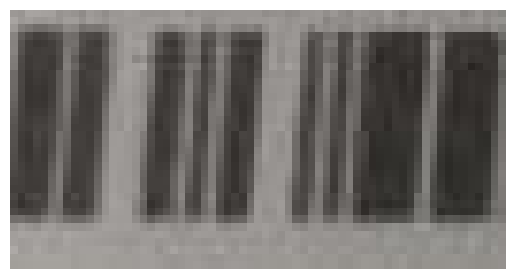

Please enter the text for this image 30:  NONE


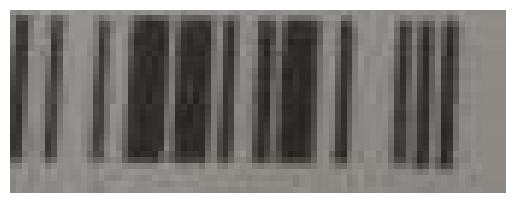

Please enter the text for this image 31:  NONE


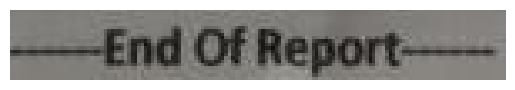

Please enter the text for this image 32:  END OF REPORT


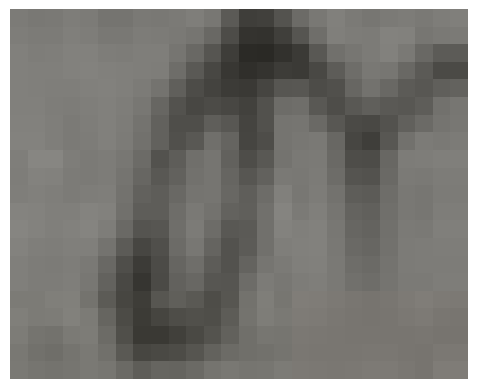

Please enter the text for this image 33:  NONE


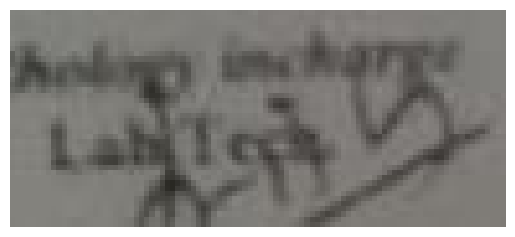

Please enter the text for this image 34:  NONE


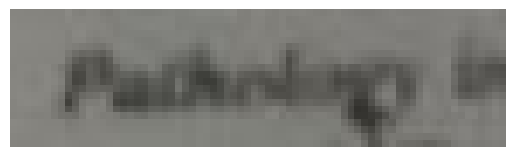

Please enter the text for this image 35:  NONE


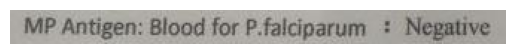

Please enter the text for this image 36:  MP ANTIGEN: BLOOD FOR P.FALCIPARUM : NEGATIVE


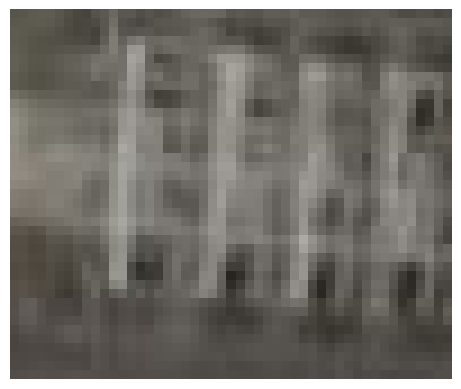

Please enter the text for this image 37:  NONE


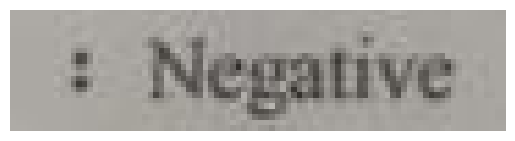

Please enter the text for this image 38:  : NEGATIVE


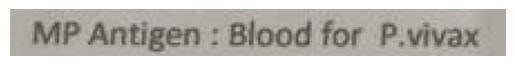

Please enter the text for this image 39:  MP ANTIGEN: BLOOD FOR P.VIVAX


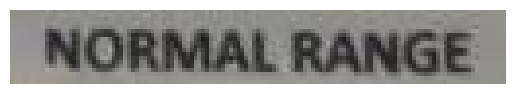

Please enter the text for this image 40:  NORMAL RANGE


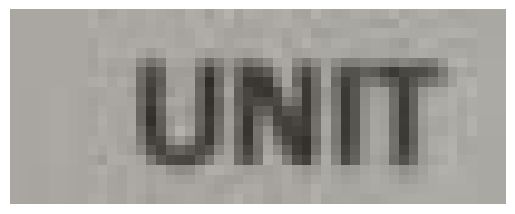

Please enter the text for this image 41:  UNIT


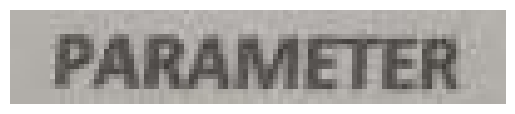

Please enter the text for this image 42:  PARAMETER


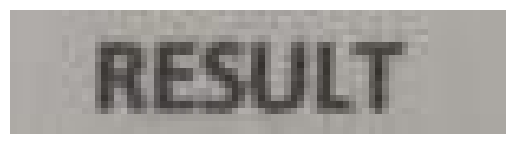

Please enter the text for this image 43:  RESULT


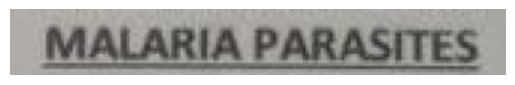

Please enter the text for this image 44:  MALARIA PARASITES


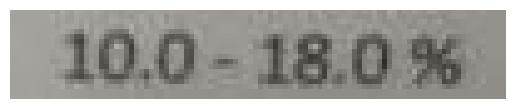

Please enter the text for this image 45:  10.0 - 18.0%


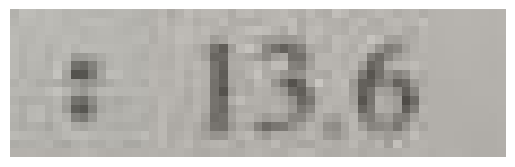

Please enter the text for this image 46:  : 13.6


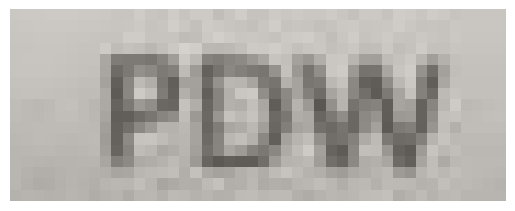

Please enter the text for this image 47:  PDW


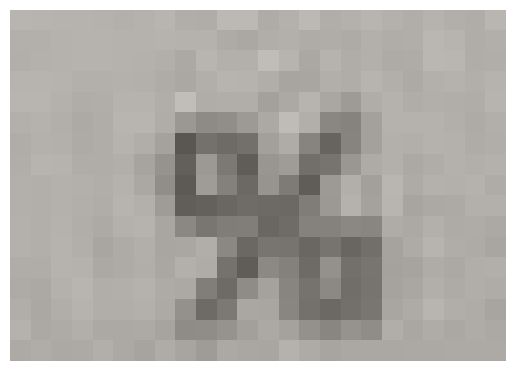

Please enter the text for this image 48:  %


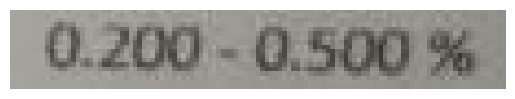

Please enter the text for this image 49:  0.200-0.500%


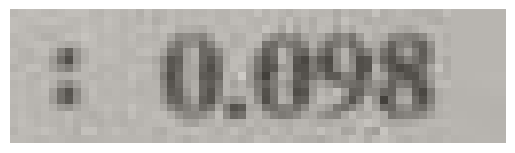

Please enter the text for this image 50:  : 0.098


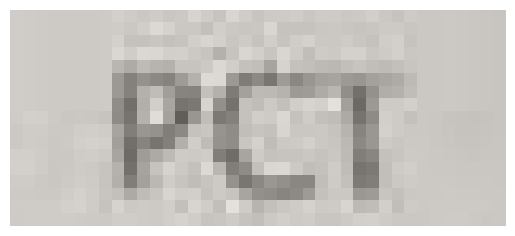

Please enter the text for this image 51:  PCT


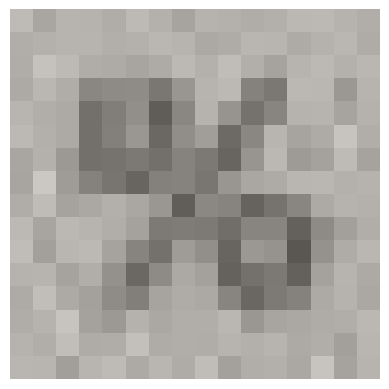

Please enter the text for this image 52:  %


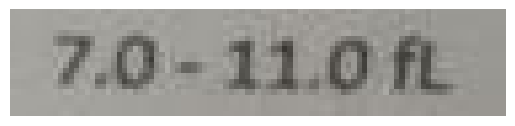

Please enter the text for this image 53:  7.0 - 11.0 FL


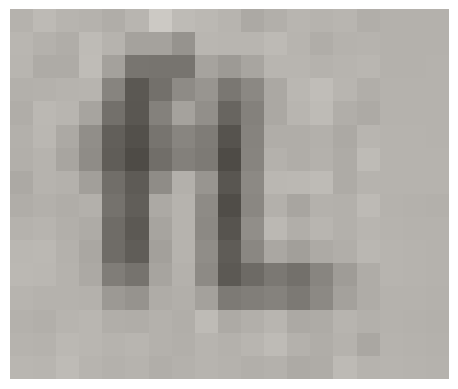

Please enter the text for this image 54:  FL


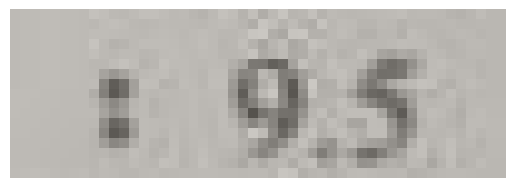

Please enter the text for this image 55:  : 9.5


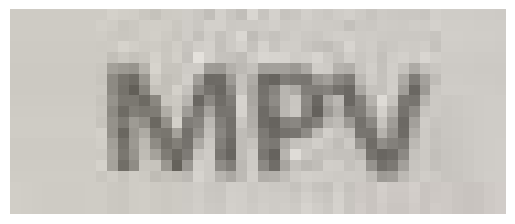

Please enter the text for this image 56:  MPV


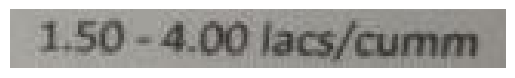

Please enter the text for this image 57:  1.50 - 4.00 LACS/CUMM


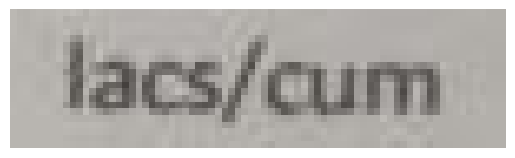

Please enter the text for this image 58:  LACS/CUMM


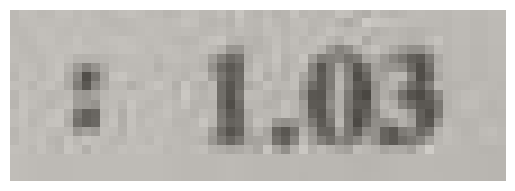

Please enter the text for this image 59:  : 1.03


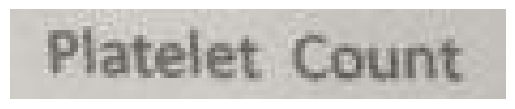

Please enter the text for this image 60:  PLATELET COUNT


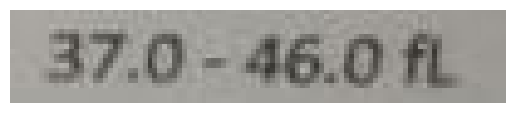

Please enter the text for this image 61:  37.0 - 46.0 FL


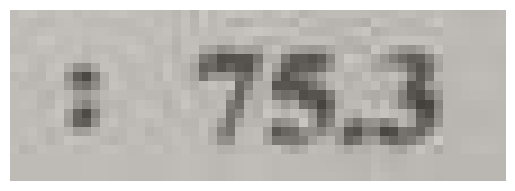

Please enter the text for this image 62:  : 75.3


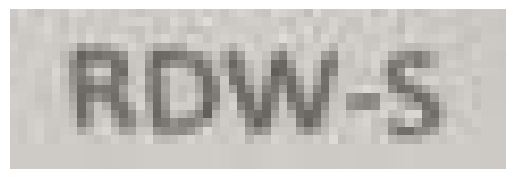

Please enter the text for this image 63:  RDW-S


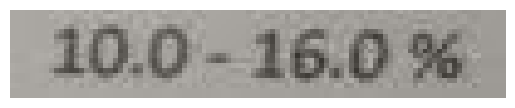

Please enter the text for this image 64:  10.0-16.0%


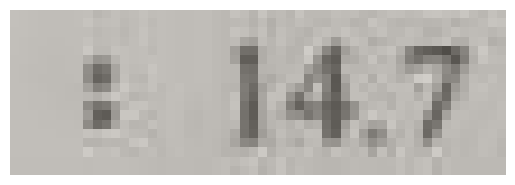

Please enter the text for this image 65:  : 14.7


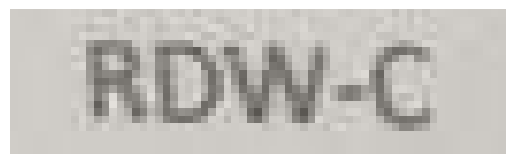

Please enter the text for this image 66:  RDW-C


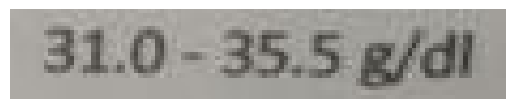

Please enter the text for this image 67:  31.0-35.5 G/DL


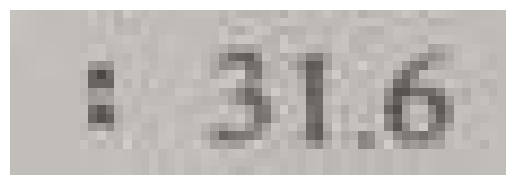

Please enter the text for this image 68:  : 31.6


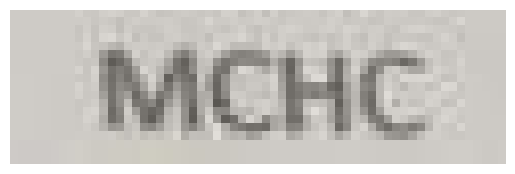

Please enter the text for this image 69:  MCHC


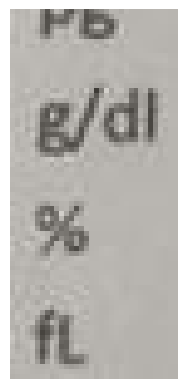

Please enter the text for this image 70:  G/DL % FL


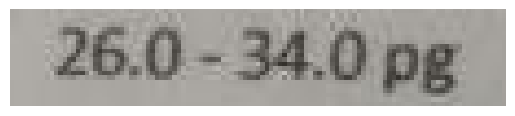

Please enter the text for this image 71:  26.0 - 34.0 PG


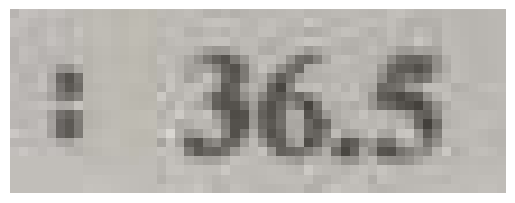

Please enter the text for this image 72:  : 36.5


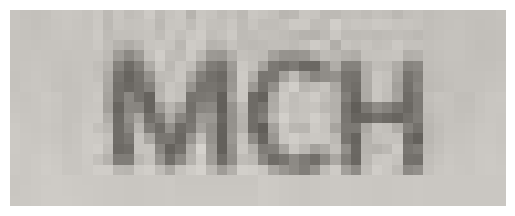

Please enter the text for this image 73:  MCH


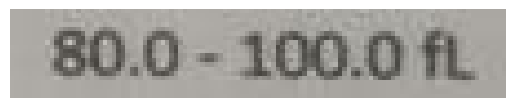

Please enter the text for this image 74:  80.0 - 100.0 FL


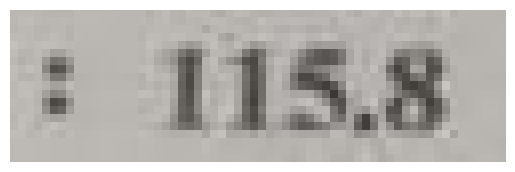

Please enter the text for this image 75:  : 115.8


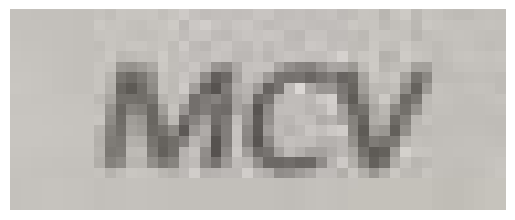

Please enter the text for this image 76:  MCV


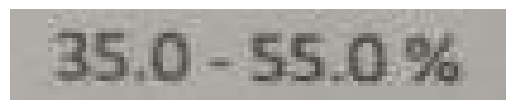

Please enter the text for this image 77:  35.0 - 55.0 %


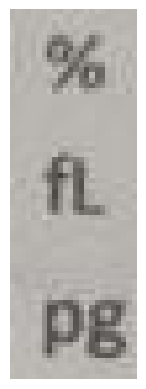

Please enter the text for this image 78:  % FL PG


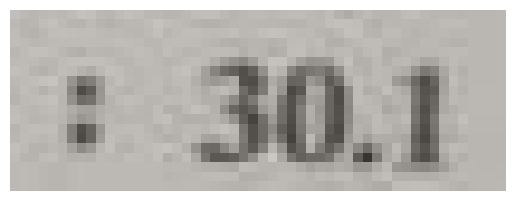

Please enter the text for this image 79:  : 30.1


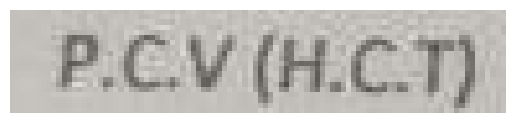

Please enter the text for this image 80:  P.C.V (H.C.T)


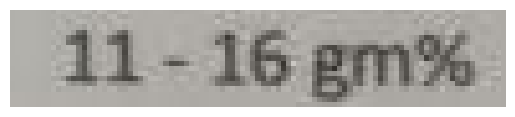

Please enter the text for this image 81:  11-16 GM%


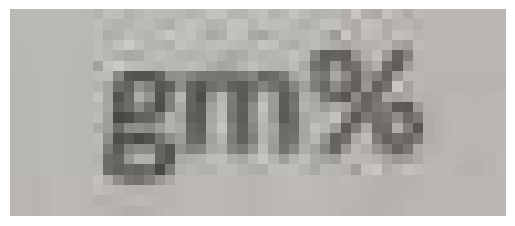

Please enter the text for this image 82:  GM%


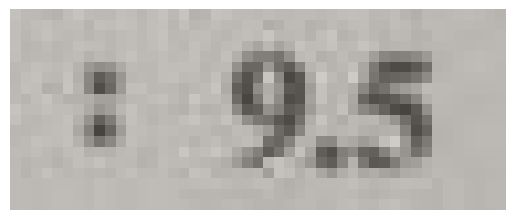

Please enter the text for this image 83:  : 9.5


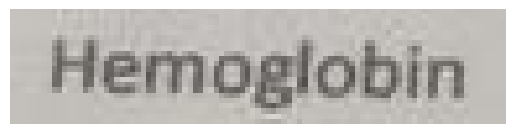

Please enter the text for this image 84:  HEMOGLOBIN


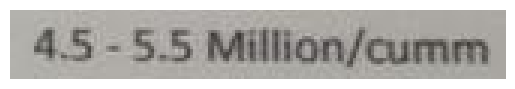

Please enter the text for this image 85:  4.5 - 5.5 MILLION/CUMM


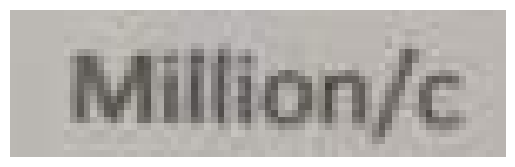

Please enter the text for this image 86:  MILLION/C


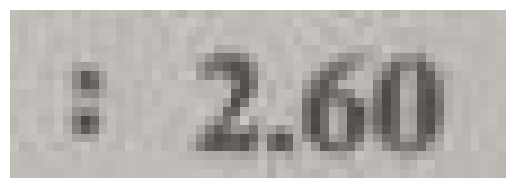

Please enter the text for this image 87:  : 2.60


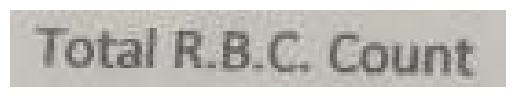

Please enter the text for this image 88:  TOTAL R.B.C. COUTN


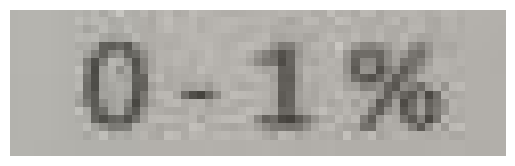

Please enter the text for this image 89:  0-1 %


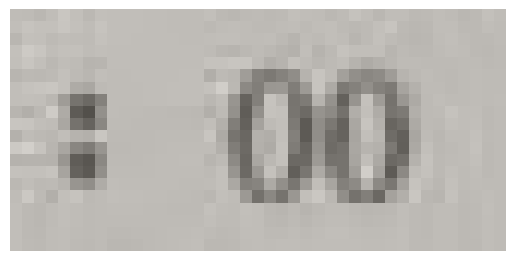

Please enter the text for this image 90:  : 00


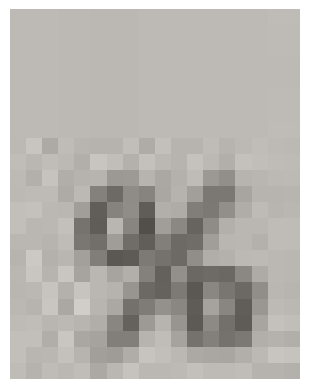

Please enter the text for this image 91:  %


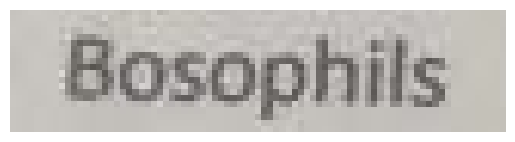

Please enter the text for this image 92:  BOSOPHILS


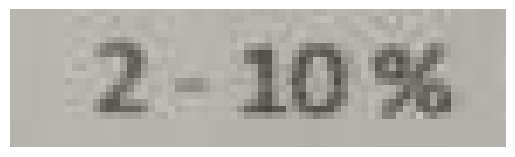

Please enter the text for this image 93:  2 - 10 %


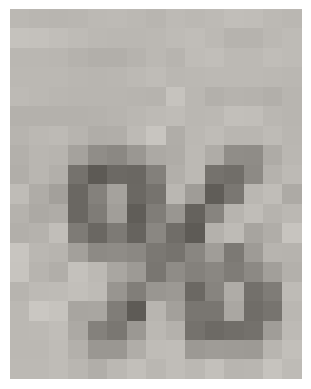

Please enter the text for this image 94:  %


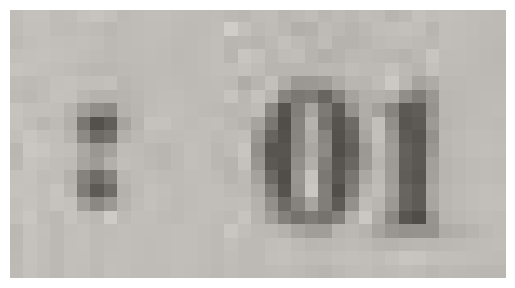

Please enter the text for this image 95:  : 01 


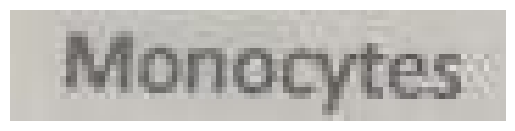

Please enter the text for this image 96:  MONOCYTES


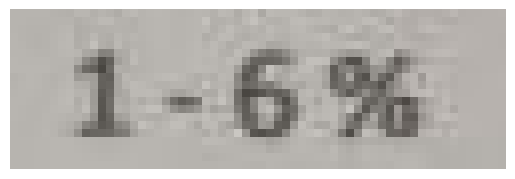

Please enter the text for this image 97:  1 - 6 %


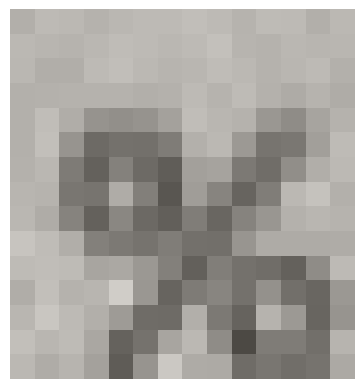

Please enter the text for this image 98:  %


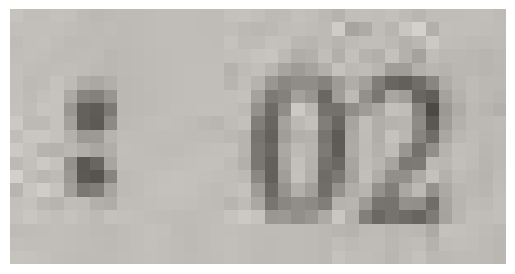

Please enter the text for this image 99:  : 02


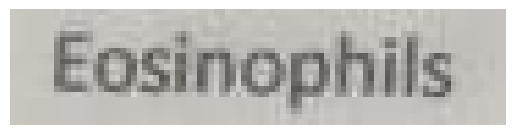

Please enter the text for this image 100:  EOSINOPHILS


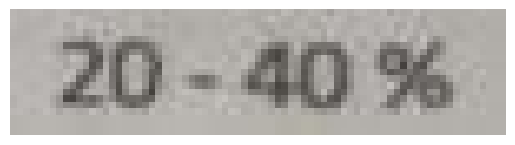

Please enter the text for this image 101:  20 - 40%


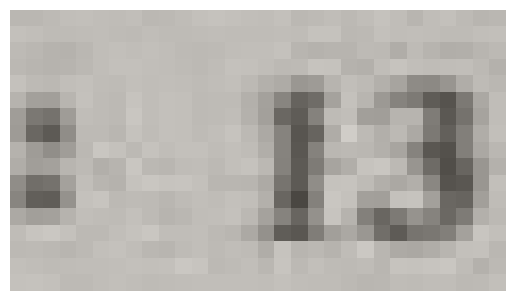

Please enter the text for this image 102:  : 13


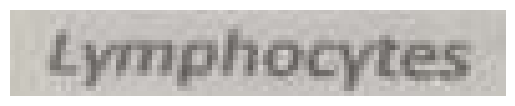

Please enter the text for this image 103:  LYMPHOCYTES


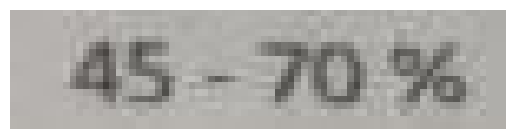

Please enter the text for this image 104:  45 - 70%


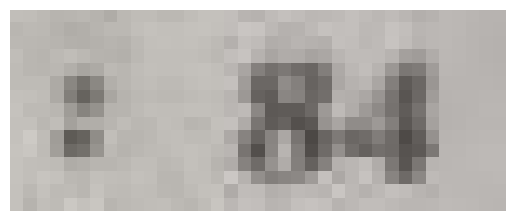

Please enter the text for this image 105:  : 84


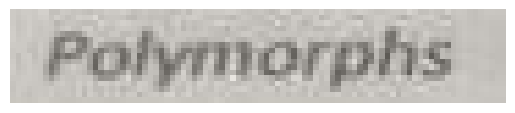

Please enter the text for this image 106:  POLYMORPHS


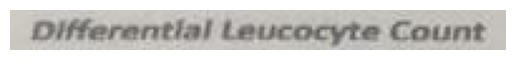

Please enter the text for this image 107:  DIFFERENTIAL LEUCOCYTE COUNT


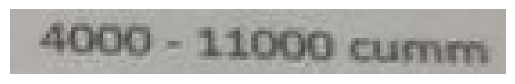

Please enter the text for this image 108:  4000 - 11000 CUMM


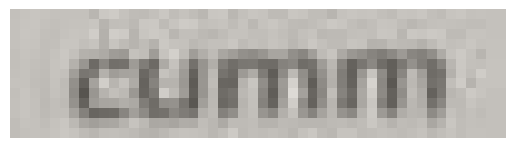

Please enter the text for this image 109:  CUMM


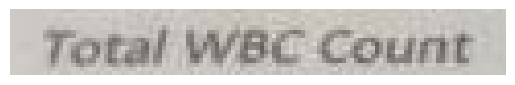

Please enter the text for this image 110:  TOTAL WBC COUNT


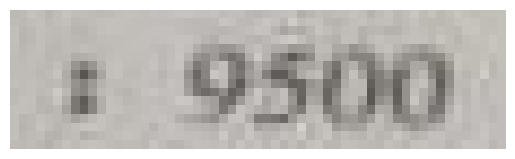

Please enter the text for this image 111:  : 9500


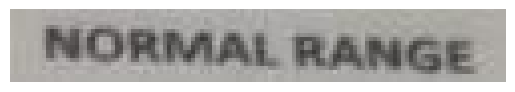

Please enter the text for this image 112:  NORMAL RANGE


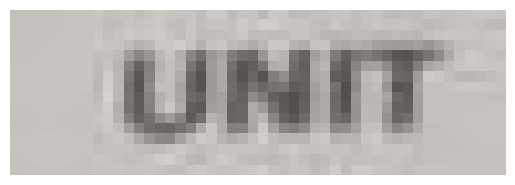

Please enter the text for this image 113:  UNIT


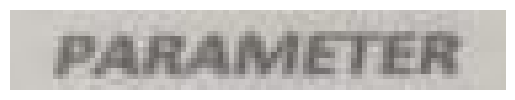

Please enter the text for this image 114:  PARAMETE


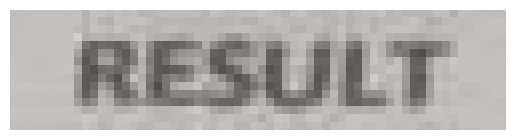

Please enter the text for this image 115:  RESULT


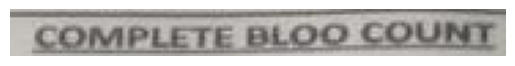

Please enter the text for this image 116:  COMPLETE BLOO COUNT


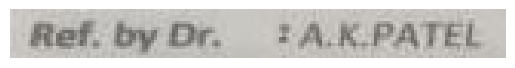

Please enter the text for this image 117:  REF. BY DR. : A.K.PATEL


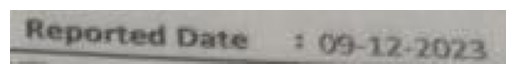

Please enter the text for this image 118:  REPORTED DATE : 09-12-2023


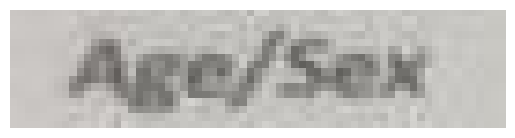

Please enter the text for this image 119:  AGE/SEX


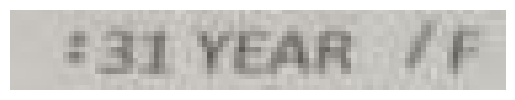

Please enter the text for this image 120:  : 31 YEAR /F


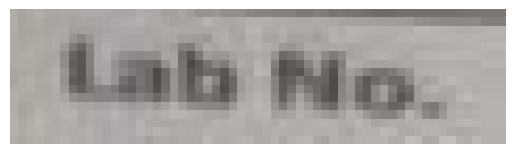

Please enter the text for this image 121:  LAB NO.


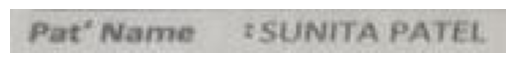

Please enter the text for this image 122:  PAT NAME: SUNITA PATEL


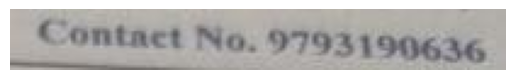

Please enter the text for this image 123:  CONTACT NO. 9793190636


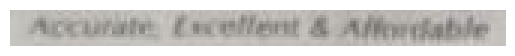

Please enter the text for this image 124:  ACCURATE EXCELLENT & AFFORDABLE


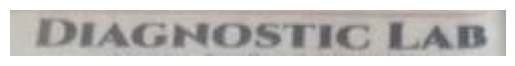

Please enter the text for this image 125:  DIAGNOSTIC LAB


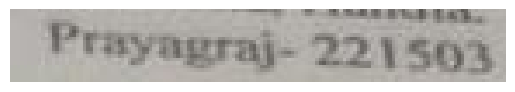

Please enter the text for this image 126:  PRAYAGRAJ - 221503


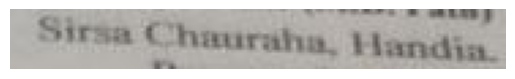

Please enter the text for this image 127:  SIRSA CHAURAHA, HANDIA


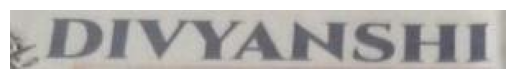

Please enter the text for this image 128:  DIVYANSHI


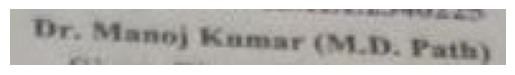

Please enter the text for this image 129:  DR. MANOJ KUMAR(M.D. PATH)


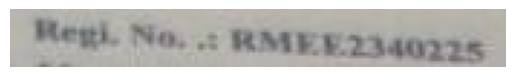

Please enter the text for this image 130:  REGI. NO.: RMEE2340225


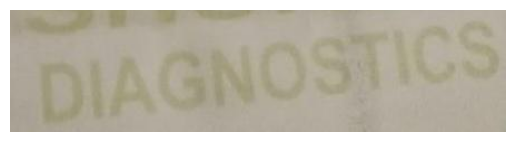

Please enter the text for this image 131:  DIAGNOSTICS


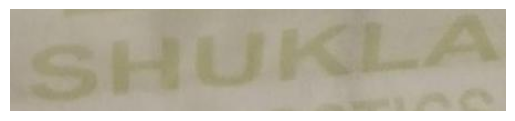

Please enter the text for this image 132:  SHUKLA


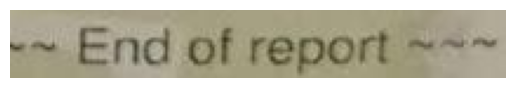

Please enter the text for this image 133:  END OF REPORT


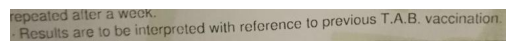

Please enter the text for this image 134:  RESULTS ARE TO BE INTERPRETED WITH REFERENCE TO PREVIOUS T.A.B. VACCINATION


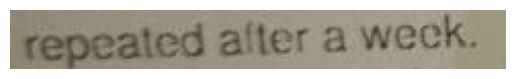

Please enter the text for this image 135:  REPEATED AFTER A WEEK


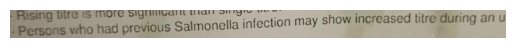

Please enter the text for this image 136:  PERSONS WHO HAD PREVIOUS SALMONELLA INFECTION MAY SHOW INCREASED TITRE DURING AN


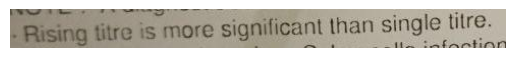

Please enter the text for this image 137:  RISING TITRE IS MORE SIGNIFICANT THAN SINGLE TITRE


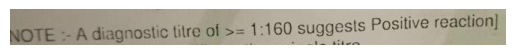

Please enter the text for this image 138:  NOTE: A DIAGNOSTIC TITRE OF >= 1:160 SUGGESTS POSITIVE REACTION


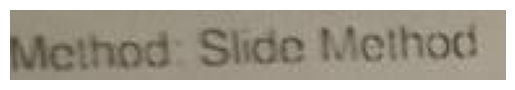

Please enter the text for this image 139:  METHOD: SLIDE METHOD


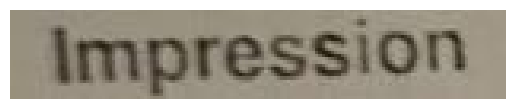

Please enter the text for this image 140:  IMPRESSION


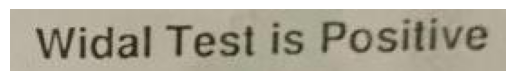

Please enter the text for this image 141:  WIDAL TEST IS POSITIVE


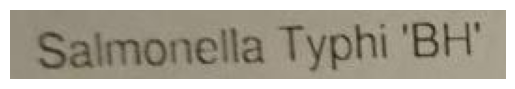

Please enter the text for this image 142:  SALMONELLA TYPHI 'BH'


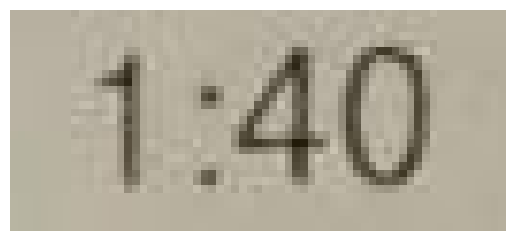

Please enter the text for this image 143:  1:40


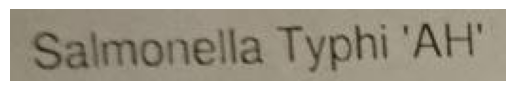

Please enter the text for this image 144:  SALMONELLA TYPHI 'AH'


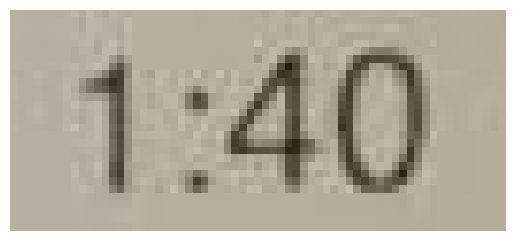

Please enter the text for this image 145:  1:40


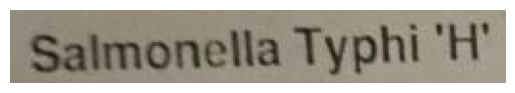

Please enter the text for this image 146:  SALMONELLA TYPHI 'H'


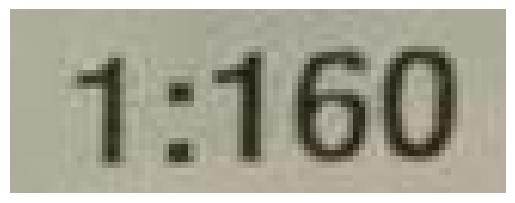

Please enter the text for this image 147:  1:160


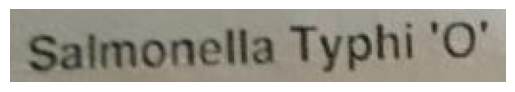

Please enter the text for this image 148:  SALMONELLA TYPHI 'O'


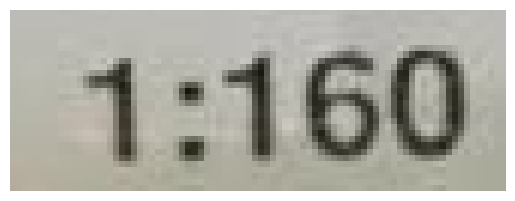

Please enter the text for this image 149:  1: 160


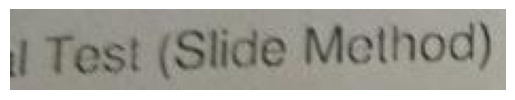

Please enter the text for this image 150:  TEST (SLIDE METHOD)


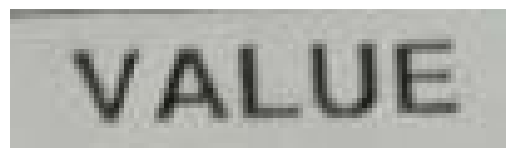

Please enter the text for this image 151:  VALUE


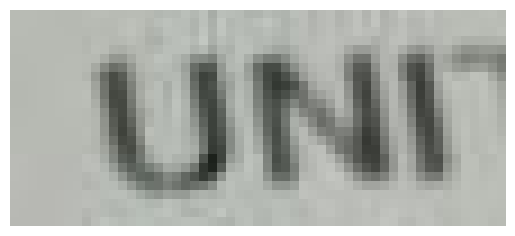

Please enter the text for this image 152:  UNI


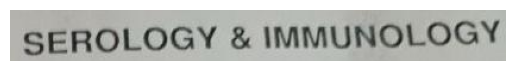

Please enter the text for this image 153:  SEROLOGY AMD IMMUNOLOGY


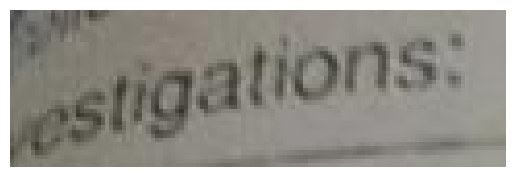

Please enter the text for this image 154:  ESTIGATIONS:


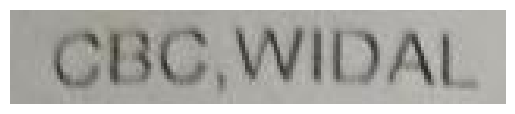

Please enter the text for this image 155:  CBC, WIDAL


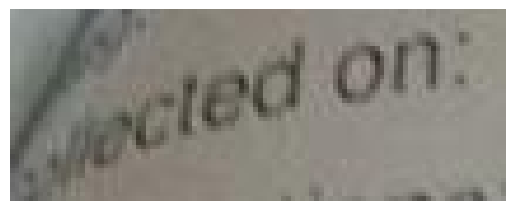

Please enter the text for this image 156:  NONE


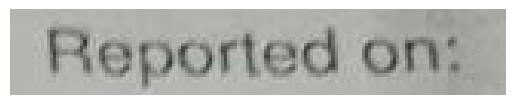

Please enter the text for this image 157:  REPORTED ON:


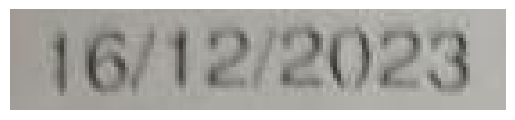

Please enter the text for this image 158:  16/12/2023


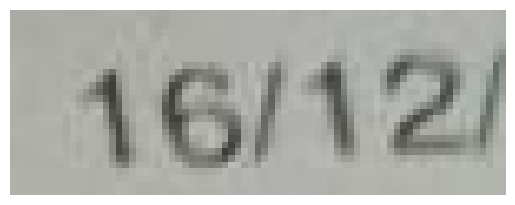

Please enter the text for this image 159:  16/12


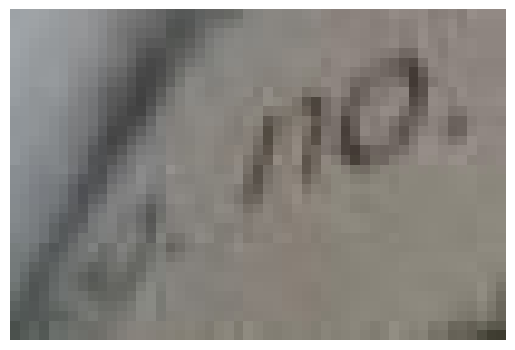

Please enter the text for this image 160:  NONE


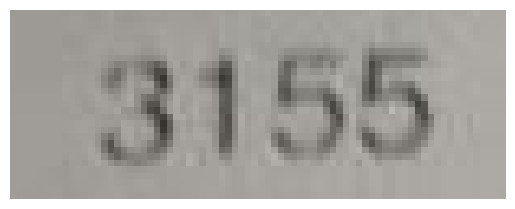

Please enter the text for this image 161:  3155


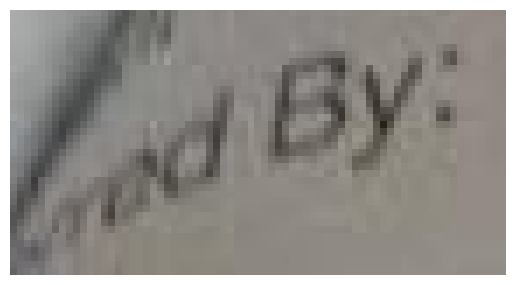

Please enter the text for this image 162:  NONE


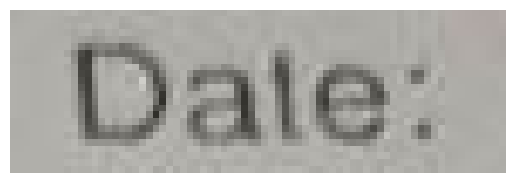

Please enter the text for this image 163:  DATE:


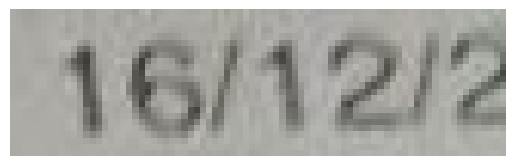

Please enter the text for this image 164:  16/12/2


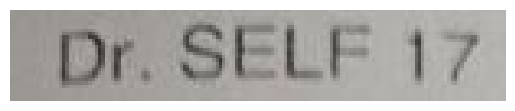

Please enter the text for this image 165:  DR. SELF 17


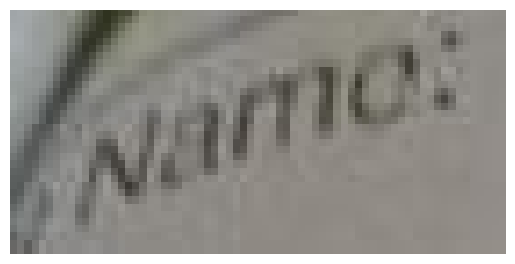

Please enter the text for this image 166:  NONE


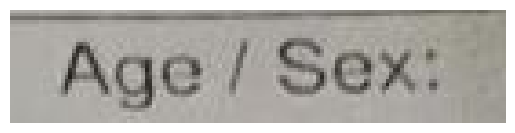

Please enter the text for this image 167:  AGE//SEX:


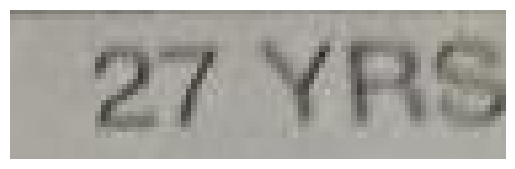

Please enter the text for this image 168:  27 YRS


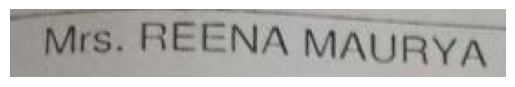

Please enter the text for this image 169:  MRS. REENA MAURYA


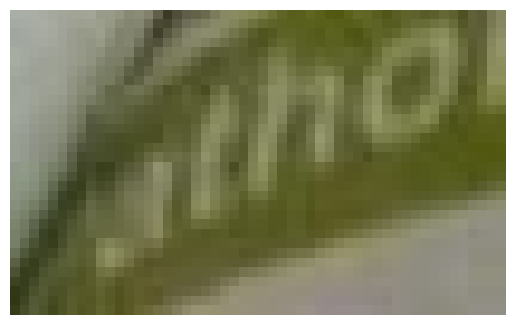

Please enter the text for this image 170:  NONE


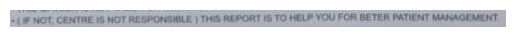

Please enter the text for this image 171:  (IF NOT CENTRE IS NOT RESPONSIBLE) THIS REPORT IS TO HELP YOU FOR BETER PATIENT MANAGEMENT


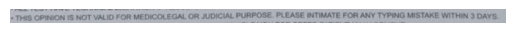

Please enter the text for this image 172:  THIS OPINION IS NOT VALID FOR MEDICOLEGAL OR JUDIVIAL PURPOSE PLEASE INTIMATE FOR ANY TYPING MISTAKE WITHIN 3 DAYS


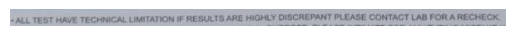

Please enter the text for this image 173:  ALL TEST HAVE TECHNICAL LIMITATION IF RESULTS ARE HIGHLY DISCREPANT PLEASEE CONTACT LAB FOR A RECHECH


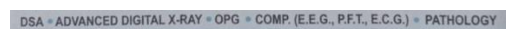

Please enter the text for this image 174:  DSA - ADVANCED DIGITAL X-RAY = OPG = COMP. (E.E.G.,P.F.T., E.C.G.) = PATHOLOGY


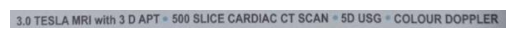

Please enter the text for this image 175:  3.0 TESLA MRI WITH 3 D APT = 500 SLICE CARDIAC CT SCAN - 5D USG = COLOUR DOPPLER


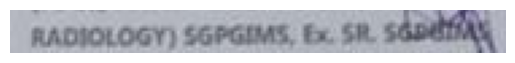

Please enter the text for this image 176:  RADIOLOGY


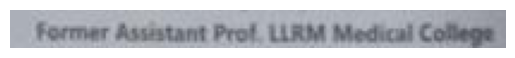

Please enter the text for this image 177:  FORMER ASSISTANT PREOF. LLSRM MEDICAL COLLEGE


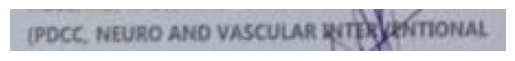

Please enter the text for this image 178:  PDCC, NEURO AND VASCULAR INTERVENTIONAL


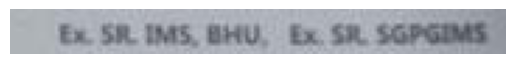

Please enter the text for this image 179:  EX. SR. IMS, BHU, EX SR. SGPGIMS


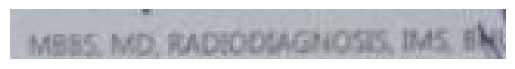

Please enter the text for this image 180:  MBBS. MD. RADIODIAGNOSIS, IMS


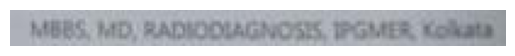

Please enter the text for this image 181:  MBBS. MD. RADIODIAGNOSIS, IPGMER, KOLKATA


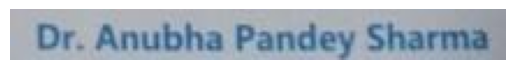

Please enter the text for this image 182:  DR. ANUBHA PANDEY SHARMA


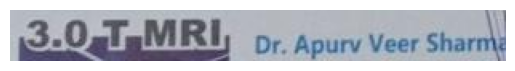

Please enter the text for this image 183:  3.0 T MRI DR. APURV VEER SHARMA


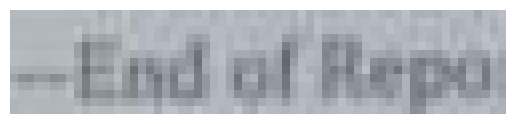

Please enter the text for this image 184:  END OF REPORT


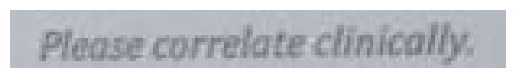

Please enter the text for this image 185:  PLEASE CORRELATE CLINICALLY.


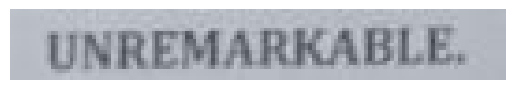

Please enter the text for this image 186:  UNREMARKABLE.


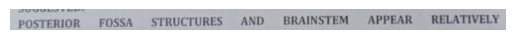

Please enter the text for this image 187:  POSTERIOR FOSSA STRUCTURES AND BRAINSTEM APPEAR RELATIVELY


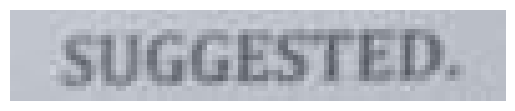

Please enter the text for this image 188:  SUGGESTED.


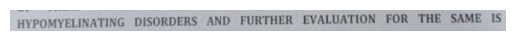

Please enter the text for this image 189:  HYPOMYELINATING DISORDERS AND FURTHER EVALUATION FOR THE SAME IS


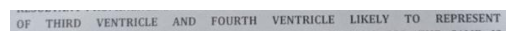

Please enter the text for this image 190:  OF THIRD VENTRICLE AND FOURTH VENTRICLE LIKELY TO REPRESENT


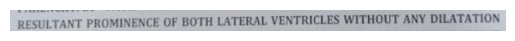

Please enter the text for this image 191:  RESULTANT PROMINENCE OF BOTH LATERAL VENTRICLES WITHOUT ANY DIALATION


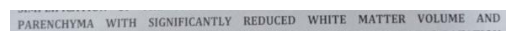

Please enter the text for this image 192:  PARENCHYMA WITH SIGNIFICANT REDUCED WHITE MATTER VOLUME AND 


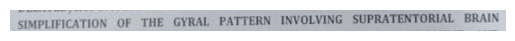

Please enter the text for this image 193:  SIMPLIFICATION OF THE GYRAL PATTERN INVOLVING SUPRATENTORIAL BRAIN


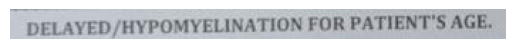

Please enter the text for this image 194:  DELAYED/HYPOMYLINATION FOR PATIENTS'S AGE


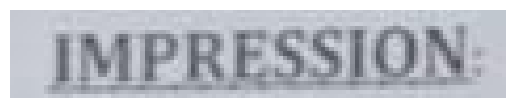

Please enter the text for this image 195:  IMPRESSION


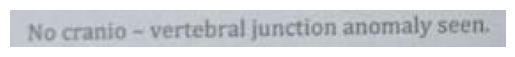

Please enter the text for this image 196:  NO CRANIO-VERTEBRAL JUNCTION ANOMALY SEEN.


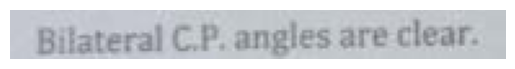

Please enter the text for this image 197:  BILATERAL C.P. ANGLES ARE CLEAR.


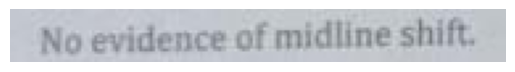

Please enter the text for this image 198:  NO EVIDENCE OF MIDLINE SHIFT.


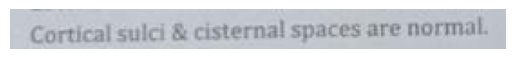

Please enter the text for this image 199:  CORTICAL SULCI & CISTERNAL SPACES ARE NORMAL


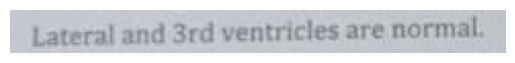

Please enter the text for this image 200:  LATERAL AND 3RD VENTRICAL ARE NORMAL 


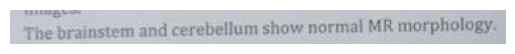

Please enter the text for this image 201:  THE BRAINSTEM AND CEREBELLUM SHOW NORMAL MR MORPHOLOGY


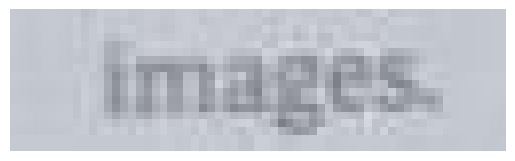

Please enter the text for this image 202:  IMAGES


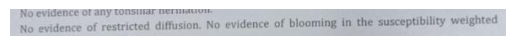

Please enter the text for this image 203:  NO EVIDENCE OF RESTRICTED DIFFUSION. NO EVIDENCE OF BLOOMING IN THE SUSCEPTIBILITY WEIGHTED


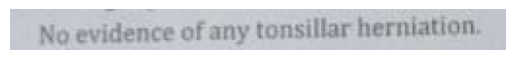

Please enter the text for this image 204:  NO EVIDENCE OF ANY TONSILLAR HERNIATION


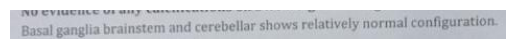

Please enter the text for this image 205:  BASAL GANGALIA BRAINSTEM AND CEREBELLAR SHOES RELATIVELY NORMAL CONFIGURATION


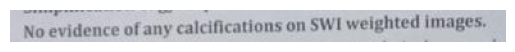

Please enter the text for this image 206:  NO EVIDENCE OF ANY CALCIFICATIONS ON SWI WEIGHTED IMAGES


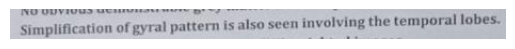

Please enter the text for this image 207:  SIMPLIFICATION OF GYRAL PATTERN IS ALSO SEEN INVILVING THE TEMPORAL LOBES.


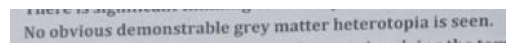

Please enter the text for this image 208:  NO OBVIOUS DEMONSTRABLE GREY MATTER HETEROPHIA IS SEEN.


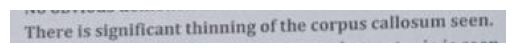

Please enter the text for this image 209:  THERE IS SIGNIFICANT THINNING OF THE CORPUS CALLOSUM SEEN.


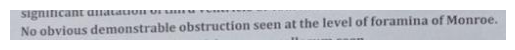

Please enter the text for this image 210:  NO OBVIOUS DEMOSNTRABLE OBSTRUCTION SEEN AT THE LEVEL OF FORAMINA OF MONROE.


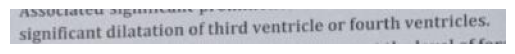

Please enter the text for this image 211:  SIGNIFICANT DILATION OF THIRD VENTRICLE OR FOURTH VENTRICLES.


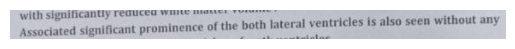

Please enter the text for this image 212:  ASSOCIATED SIGNIFICANT PREOMINENCE OF THE BOTH LATERAL VENTRICLES IS ALSO SEEN WITHOUT ANY


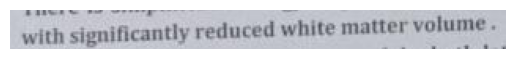

Please enter the text for this image 213:  WITH SIGNIFICANT REDUCED WHITE MATTER VOLUME.


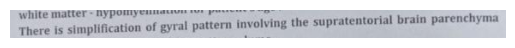

Please enter the text for this image 214:  THERE IS SIMPLIFICATION OF GYRAL PATTERN INVOLVING THE SUPRATENTORIAL BRAIN PARENCHYMA


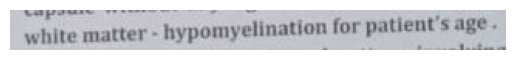

Please enter the text for this image 215:  WHITE MATTER - HYPOMYELINATION OF PATIENT'S AGE.


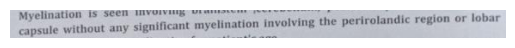

Please enter the text for this image 216:  CAPSULE WITHOUT ANY SIGNIFICANT MYELINATION INVOLVING THE PERIROLANDRIC REGION OR LOBAR


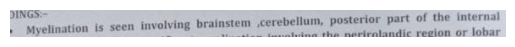

Please enter the text for this image 217:  MYELINATION IS SEEN INVOLVING BRAINSTEM, CEREBELLUM, POSTERIOR PART OF THE INTERNAL 


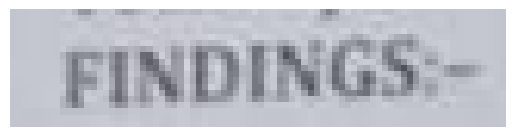

Please enter the text for this image 218:  FINDINGS:-


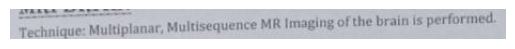

Please enter the text for this image 219:  TECHNIQUE: MULTIPLANAR, MULTISEQUENCE MR IMAGING OF THE BRAIN IS PERFORMED


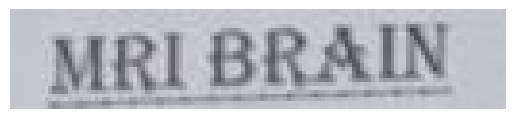

Please enter the text for this image 220:  MRI BRAIN


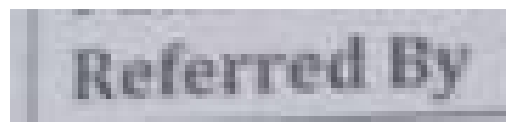

Please enter the text for this image 221:  REFERRED BY


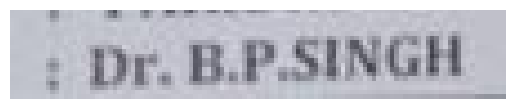

Please enter the text for this image 222:  : DR. B.P.SINGH


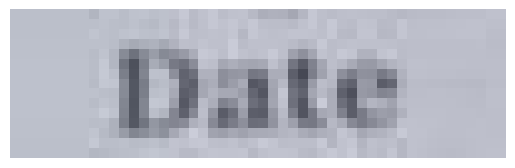

Please enter the text for this image 223:  DATE


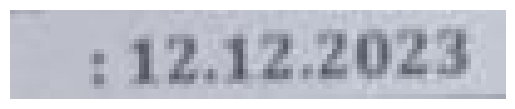

Please enter the text for this image 224:  : 12.12.2023


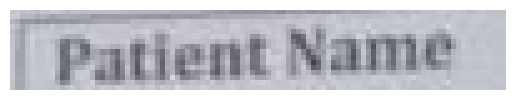

Please enter the text for this image 225:  PATIENT NAME


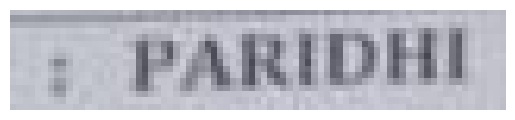

Please enter the text for this image 226:  : PARIDHI


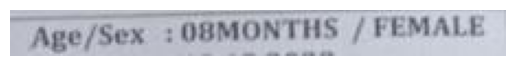

Please enter the text for this image 227:  AGE/SEX : 08MONTHS/FEMALE


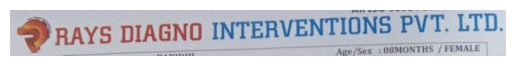

Please enter the text for this image 228:  RAYS DIAGNO INTERVENTIONS PVT.LTD.


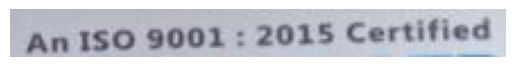

Please enter the text for this image 229:  AN ISO 9001:2015 CERTIFED


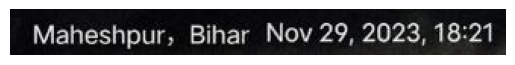

Please enter the text for this image 230:  MAHESHPUR, BIHAR NOV 29,2023,18:21


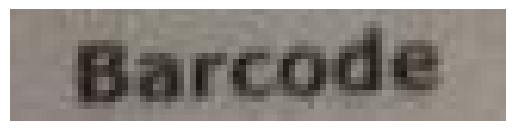

Please enter the text for this image 231:  BARCODE


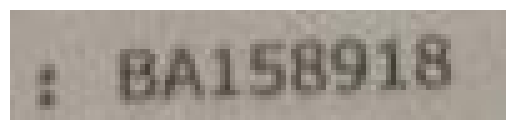

Please enter the text for this image 232:  : BA158918


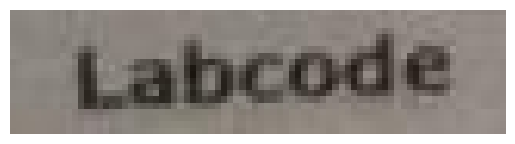

Please enter the text for this image 233:  LABCODE


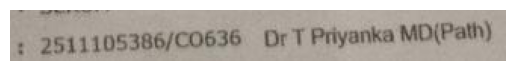

Please enter the text for this image 234:  : 2511105386/CO636 DR T PRIA=YANKA MD(PATH)


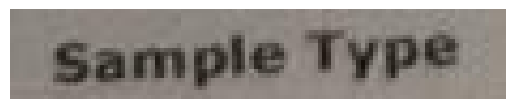

Please enter the text for this image 235:  SAMPLE TYPE


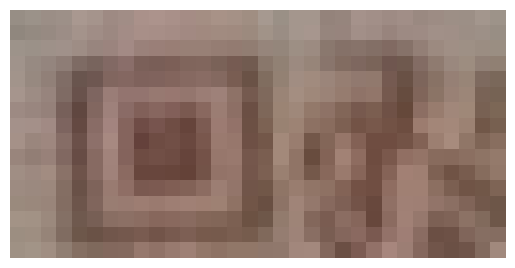

Please enter the text for this image 236:  NONE


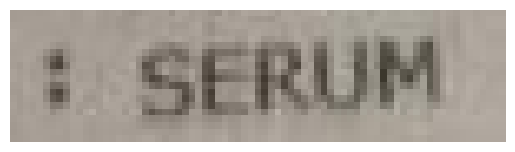

Please enter the text for this image 237:  : SERUM


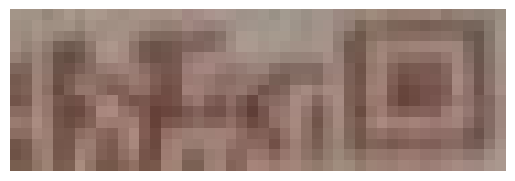

Please enter the text for this image 238:  NONE


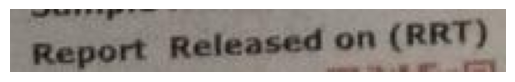

Please enter the text for this image 239:  REPORT RELEASED ON (RRT)


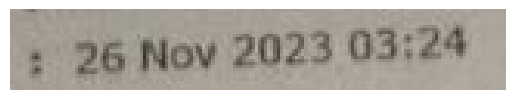

Please enter the text for this image 240:  : 26 NOV 2023 03:24


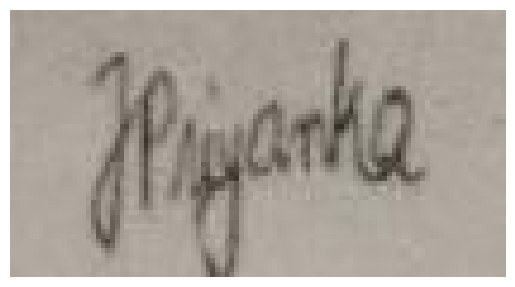

Please enter the text for this image 241:  PRIYANKA


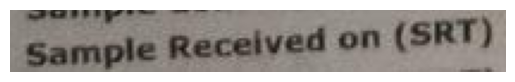

Please enter the text for this image 242:  SAMPLE RECEIVED ON (SRT)


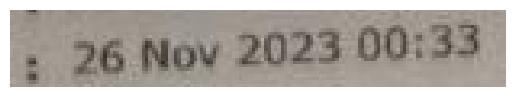

Please enter the text for this image 243:  : 26 NOV 2023 00:33


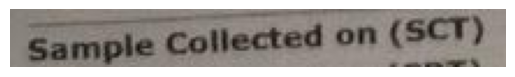

Please enter the text for this image 244:  SAMPLE COLLECTED ON (SCT)


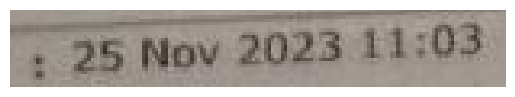

Please enter the text for this image 245:  : 25 NOV 2023 11:03


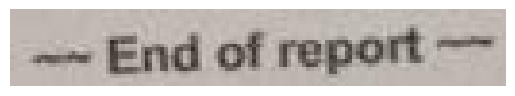

Please enter the text for this image 246:  END OF REPORT


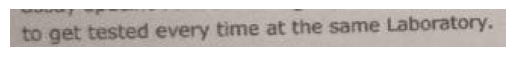

Please enter the text for this image 247:  TO GET TESTED EVERY TIME AT THE SAME LABORATORY


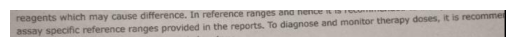

Please enter the text for this image 248:  NONE


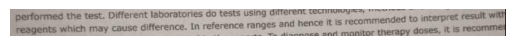

Please enter the text for this image 249:  NONE


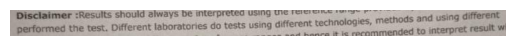

Please enter the text for this image 250:  NONE


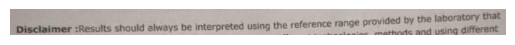

Please enter the text for this image 251:  NONE


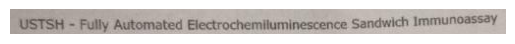

Please enter the text for this image 252:  USTSH-FULLY AUTOMATED ELECTROCHEMILUMINESCEB=NCE SANDWICH IMMUNOASSAY


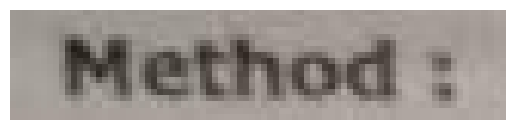

Please enter the text for this image 253:  METHOD : 


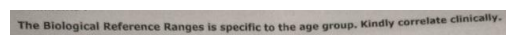

Please enter the text for this image 254:  THE BIOLOGICAL REFERENCE RANGES IS SPECIFIC TO THE AGE GROUP. KINDLY CORRELATE CLINICALLY.


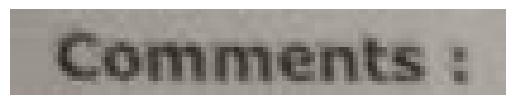

Please enter the text for this image 255:  COMMENTS:


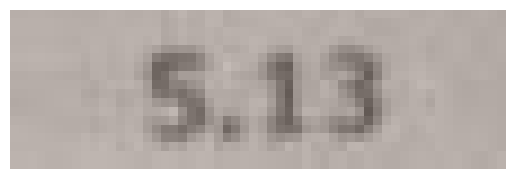

Please enter the text for this image 256:  5.13


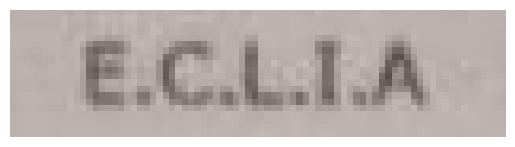

Please enter the text for this image 257:  E.C.L.I.A


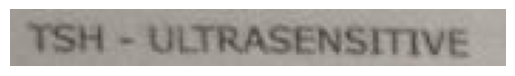

Please enter the text for this image 258:  TSH - ULTRASENSITIVE


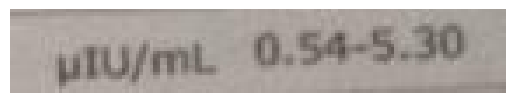

Please enter the text for this image 259:  NONE


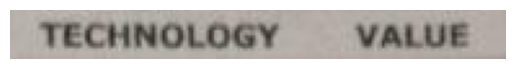

Please enter the text for this image 260:  TECHNOLOGY VALUE


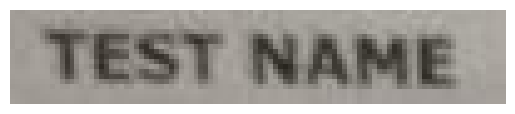

Please enter the text for this image 261:  TEST NAME


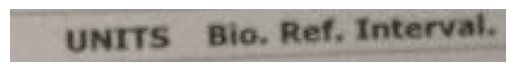

Please enter the text for this image 262:  UNITS BIO. REF. INTERVAL


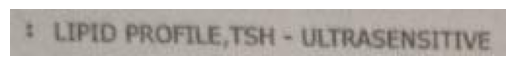

Please enter the text for this image 263:  : LIPID PROFILE, TSH - ULTRASENSITIVE


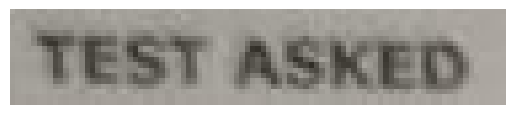

Please enter the text for this image 264:  TEST ASKED


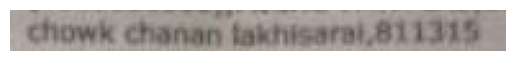

Please enter the text for this image 265:  CHOWK CHANAN LAKHISARAL, 811315


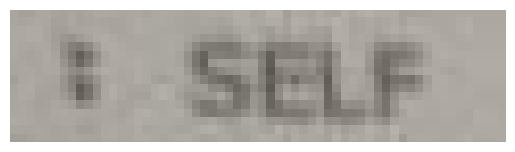

Please enter the text for this image 266:  : SELF


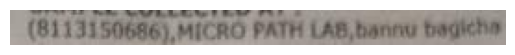

Please enter the text for this image 267:  (8113150686), MICRO PATH LAB, BANNU BAGICHA


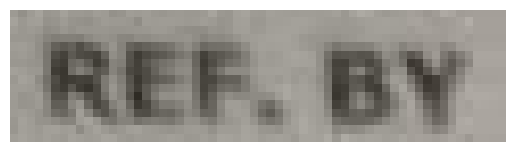

Please enter the text for this image 268:  REF. BY


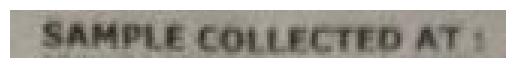

Please enter the text for this image 269:  SAMPLE COLLECTED AT:


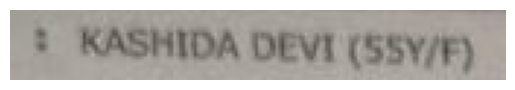

Please enter the text for this image 270:  : KASHIDA DEVI (55Y/F)


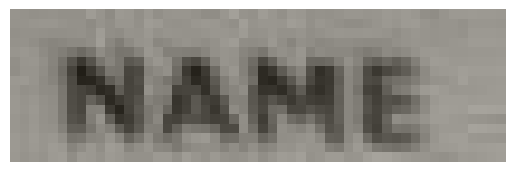

Please enter the text for this image 271:  NAME


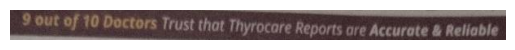

Please enter the text for this image 272:  9 OUT OF 10 DOCTORS TRUST THYROCARE REPORTS ARE ACCURATE & RELIABLE


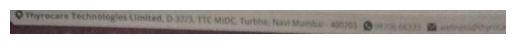

Please enter the text for this image 273:  NONE


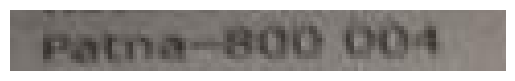

Please enter the text for this image 274:  PATNA - 800 004


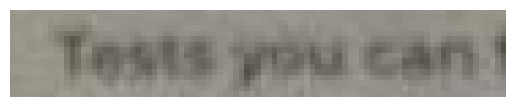

Please enter the text for this image 275:  TESTS YOU CAN


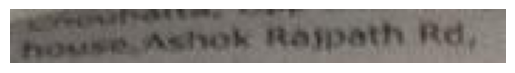

Please enter the text for this image 276:  ASHOK RAJPATH RD,


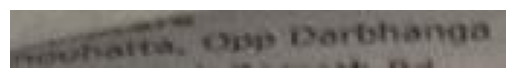

Please enter the text for this image 277:  NONE


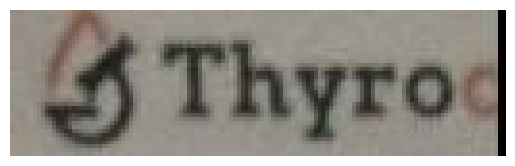

Please enter the text for this image 278:  THYRO


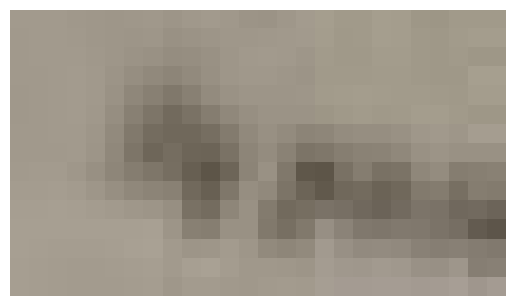

Please enter the text for this image 279:  NONE


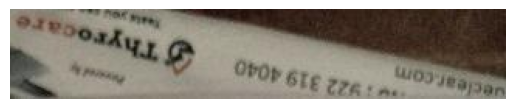

Please enter the text for this image 280:  NONE


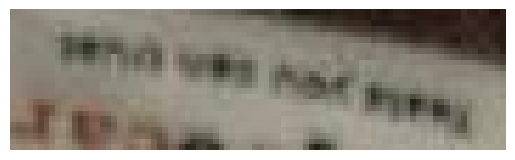

Please enter the text for this image 281:  NONE


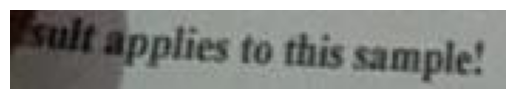

Please enter the text for this image 282:  APPLIES TO THIS SAMPLE!


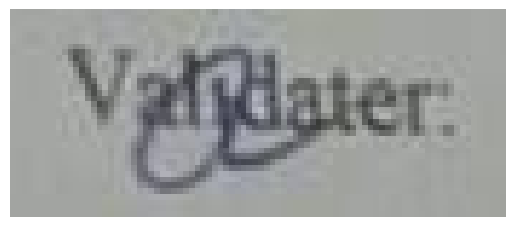

Please enter the text for this image 283:  VALIDATER:


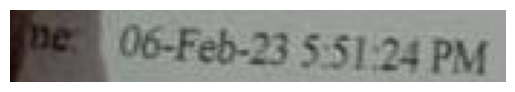

Please enter the text for this image 284:  06-FEB-23 5:51:24 PM


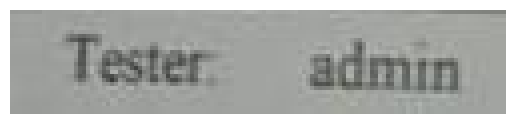

Please enter the text for this image 285:  TESTER: ADMIN


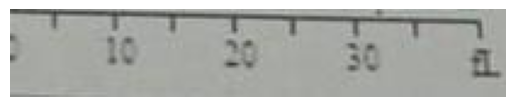

Please enter the text for this image 286:  10 20 30 FL


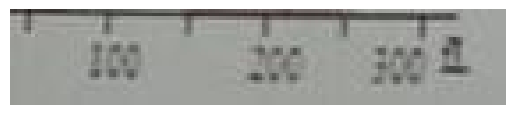

Please enter the text for this image 287:  100 200 300 FL


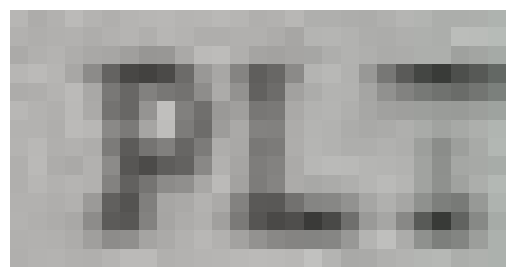

Please enter the text for this image 288:  NONE


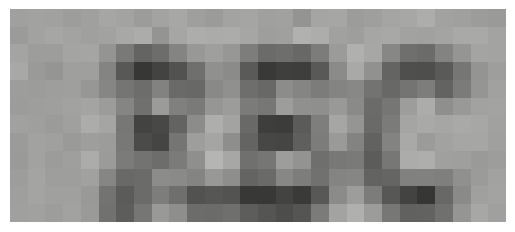

Please enter the text for this image 289:  NONE


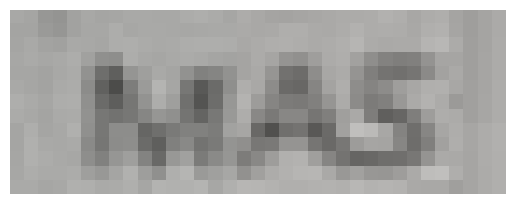

Please enter the text for this image 290:  NONE


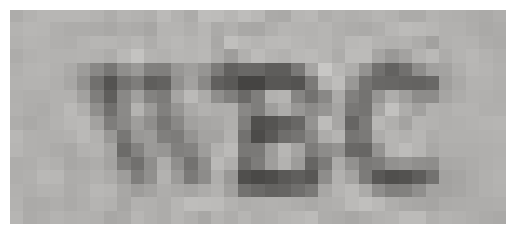

Please enter the text for this image 291:  NONE


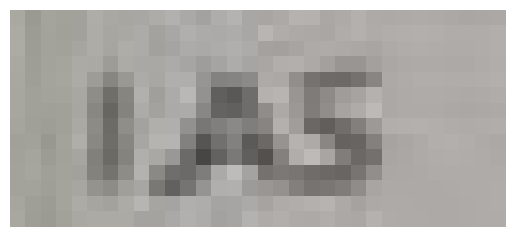

Please enter the text for this image 292:  NONE


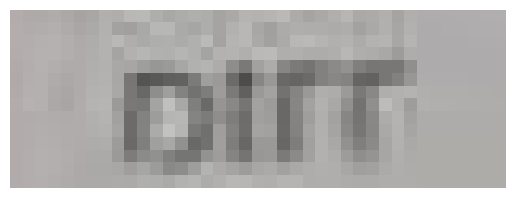

Please enter the text for this image 293:  NONE


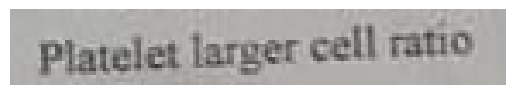

Please enter the text for this image 294:  PLATELET LARGER CELL RATIO


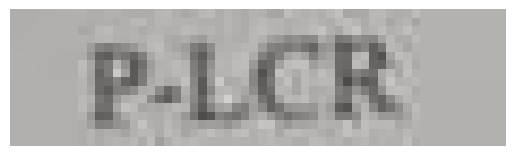

Please enter the text for this image 295:  P-LCR


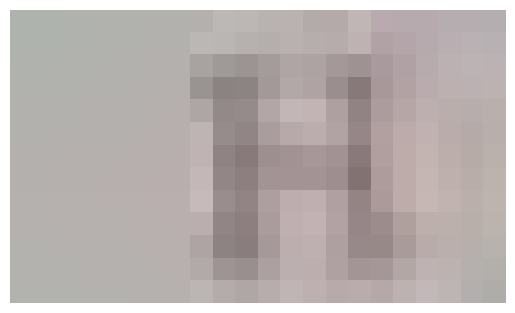

Please enter the text for this image 296:  NONE


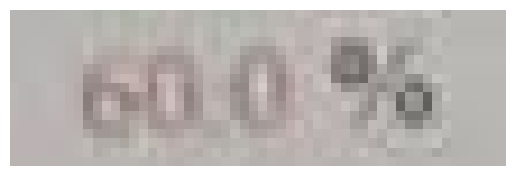

Please enter the text for this image 297:  60.0%


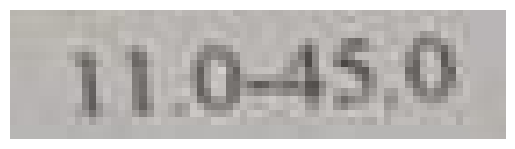

Please enter the text for this image 298:  11.0 - 45.0


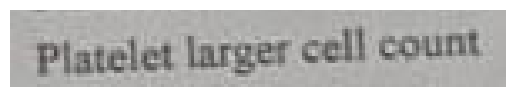

Please enter the text for this image 299:  PLATELET LARGER CELL COUNT


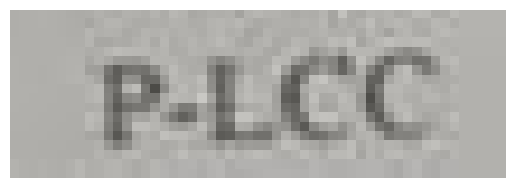

Please enter the text for this image 300:  P - LCC


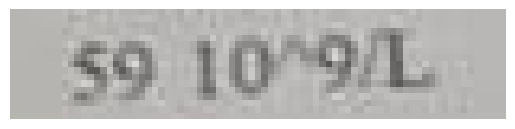

Please enter the text for this image 301:  59 10^9/L


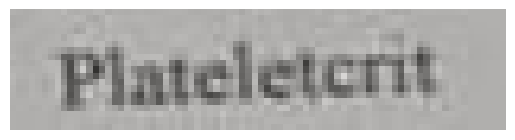

Please enter the text for this image 302:  PLATELERIT


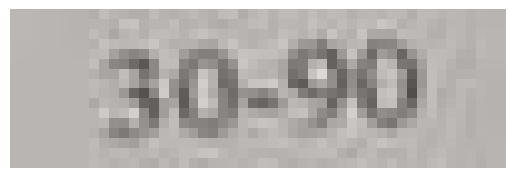

Please enter the text for this image 303:  30-90


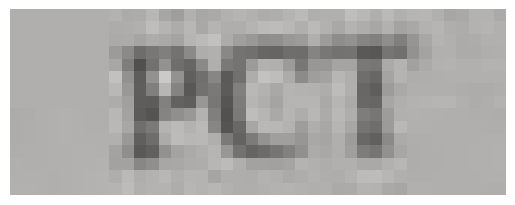

Please enter the text for this image 304:  PCT


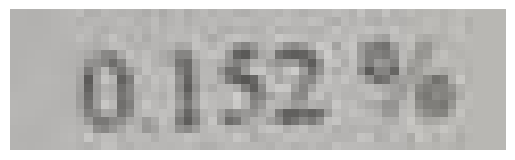

Please enter the text for this image 305:  0.152%


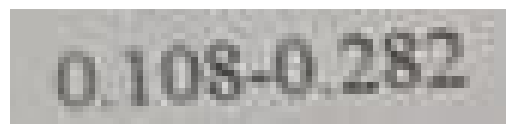

Please enter the text for this image 306:  0.108 - 0.282


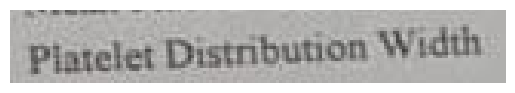

Please enter the text for this image 307:  PLATELET DISTRIBUTION WIDTH


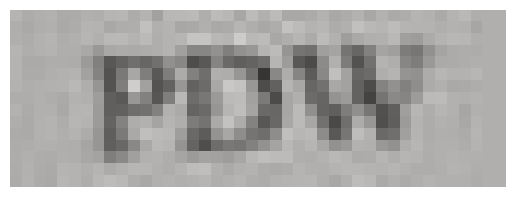

Please enter the text for this image 308:  PDW


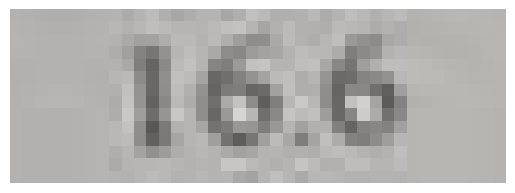

Please enter the text for this image 309:  16.6


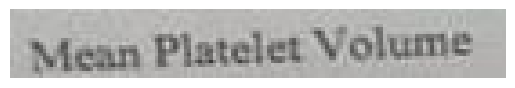

Please enter the text for this image 310:  MEAN PLATELET VOLUME


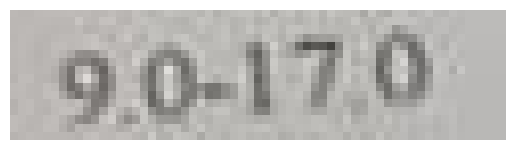

Please enter the text for this image 311:  9.0 - 17.0


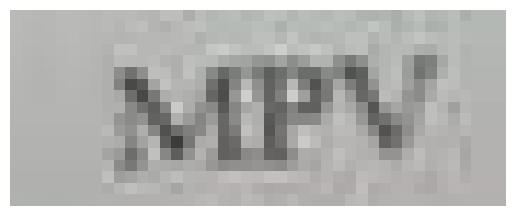

Please enter the text for this image 312:  MPV


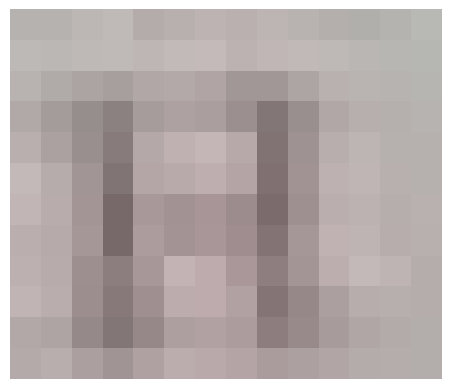

Please enter the text for this image 313:  H


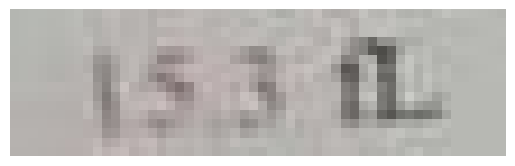

Please enter the text for this image 314:  NONE


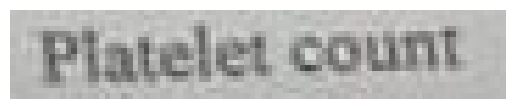

Please enter the text for this image 315:  PLATELET COUNT


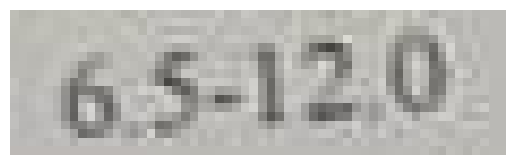

Please enter the text for this image 316:  6.5 - 12.0


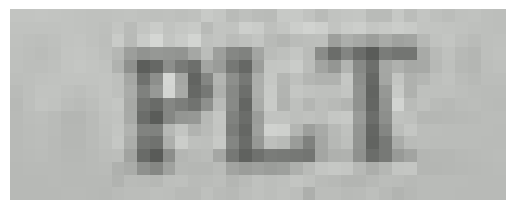

Please enter the text for this image 317:  PLT


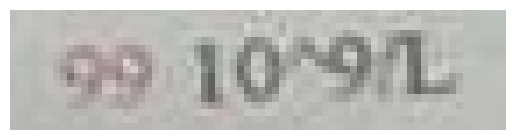

Please enter the text for this image 318:  NONE


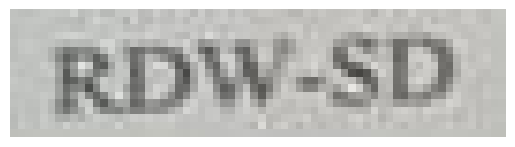

Please enter the text for this image 319:  RDW-SD


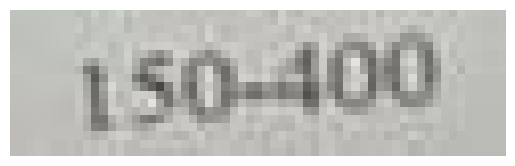

Please enter the text for this image 320:  150-400


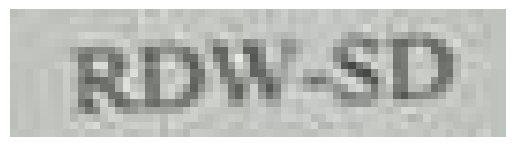

Please enter the text for this image 321:  RDW-SD


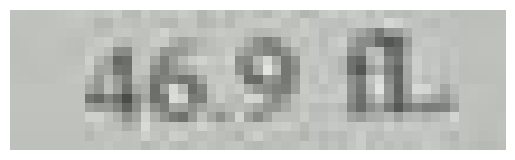

Please enter the text for this image 322:  46.9 FL


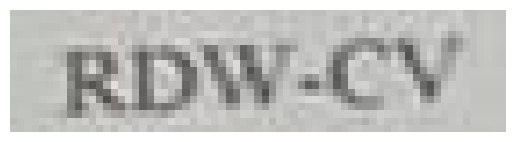

Please enter the text for this image 323:  RDW-CV


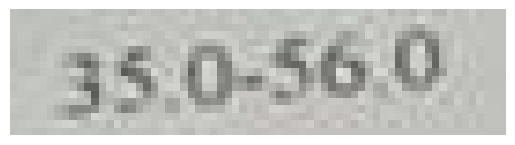

Please enter the text for this image 324:  35.9-56.0


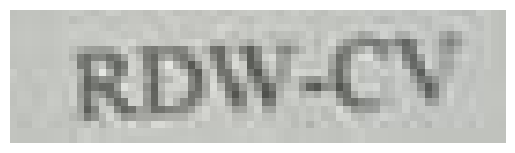

Please enter the text for this image 325:  RDW-CV


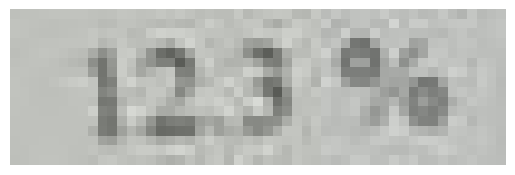

Please enter the text for this image 326:  12.3%


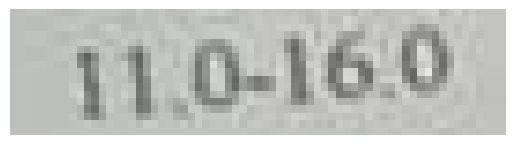

Please enter the text for this image 327:  11.0-16.0


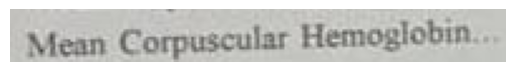

Please enter the text for this image 328:  MEAN CORPUSCULAR HEMOGLOBIN


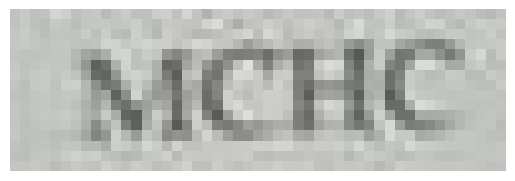

Please enter the text for this image 329:  MCHC


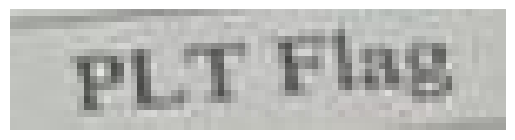

Please enter the text for this image 330:  PLT FLAG


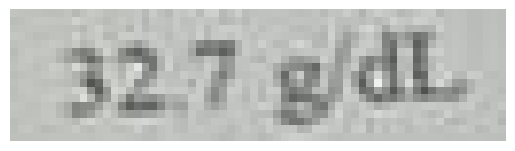

Please enter the text for this image 331:  32.7 G/DL


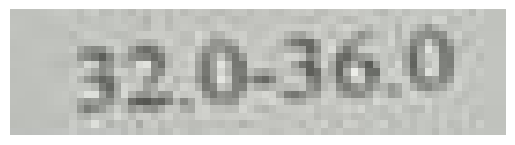

Please enter the text for this image 332:  32.0 - 36.0


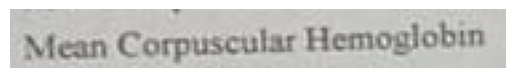

Please enter the text for this image 333:  MEAN CORPUSCULAR HEMOGLOBIN


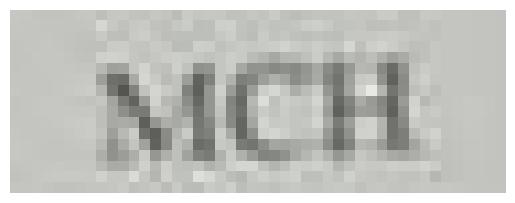

Please enter the text for this image 334:  MCH


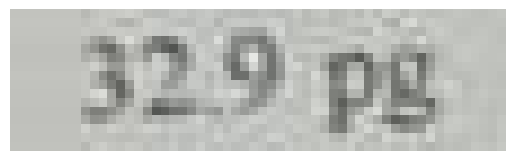

Please enter the text for this image 335:  32.9PG


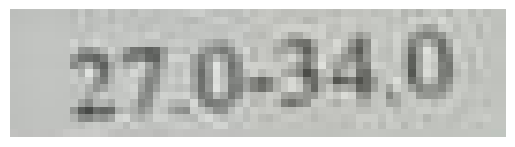

Please enter the text for this image 336:  27.0-34.0


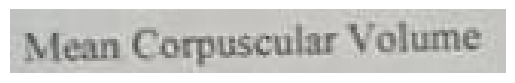

Please enter the text for this image 337:  MEAN CORPUSCULAR HEMOGLOBIN


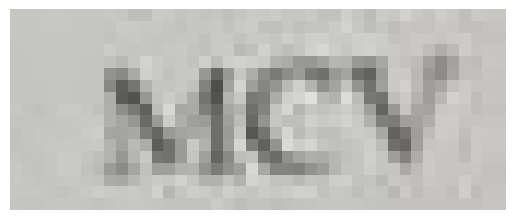

Please enter the text for this image 338:  MCV


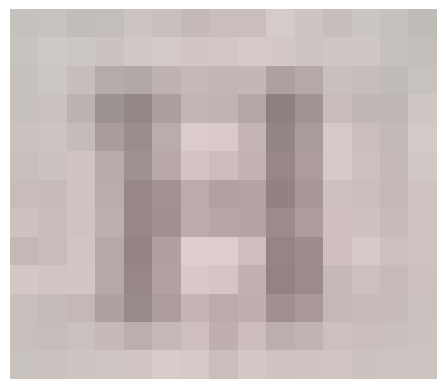

Please enter the text for this image 339:  H


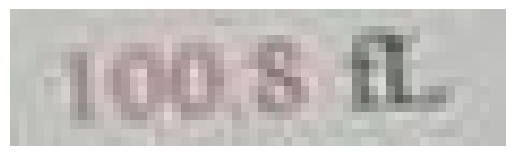

Please enter the text for this image 340:  NONE


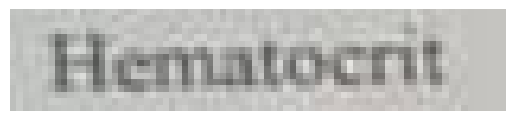

Please enter the text for this image 341:  HEMANTOCNI


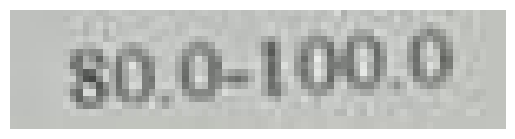

Please enter the text for this image 342:  80.0-100.0


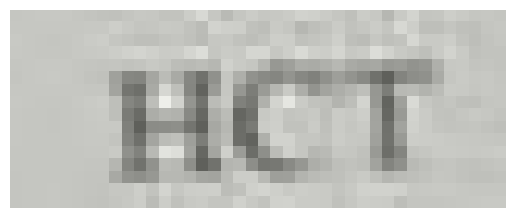

Please enter the text for this image 343:  HCT


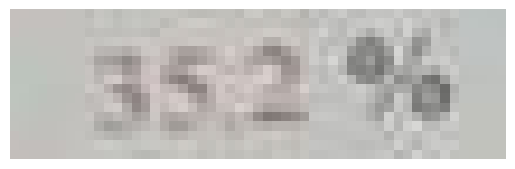

Please enter the text for this image 344:  35.2%


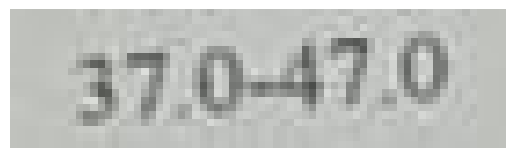

Please enter the text for this image 345:  37.0-47.0


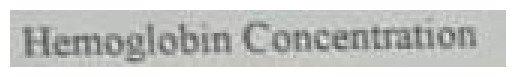

Please enter the text for this image 346:  HEMOGLOBIN CONCENTRATION


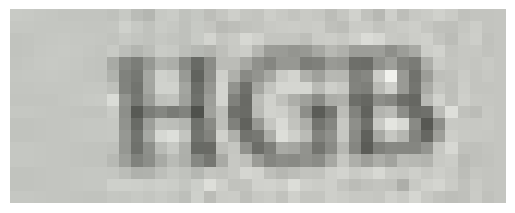

Please enter the text for this image 347:  HGB


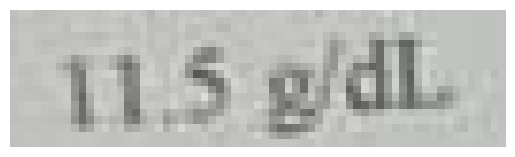

Please enter the text for this image 348:  11.5 G/DL


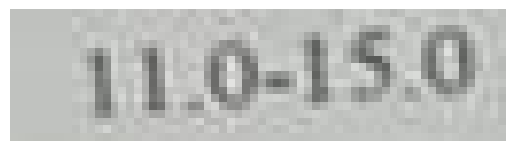

Please enter the text for this image 349:  11.0-15.0


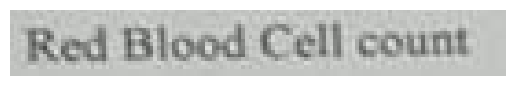

Please enter the text for this image 350:  RED BLOOD CELL COUNT


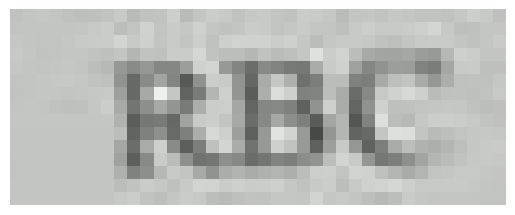

Please enter the text for this image 351:  RBS


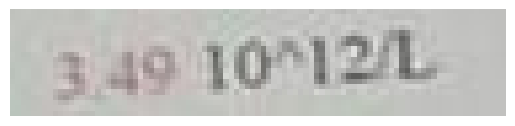

Please enter the text for this image 352:  3:49 10^12/L


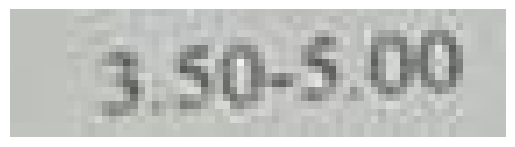

Please enter the text for this image 353:  3.50 - 5.00


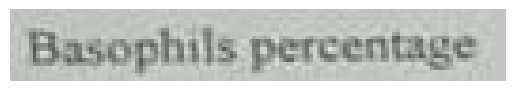

Please enter the text for this image 354:  BASOPHILIS PERCENTAGE


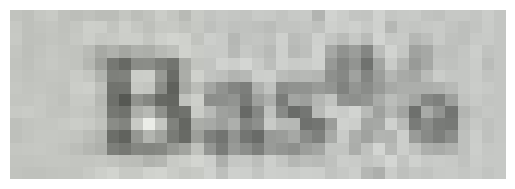

Please enter the text for this image 355:  NONE


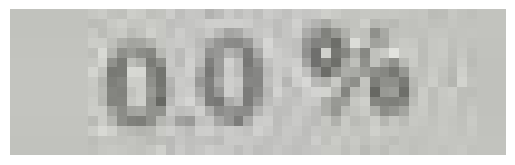

Please enter the text for this image 356:  0.0%


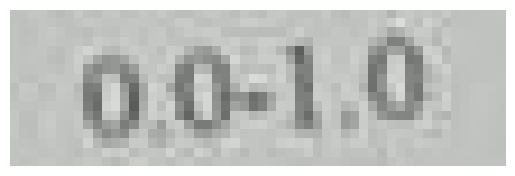

Please enter the text for this image 357:  0.0 - 1.0


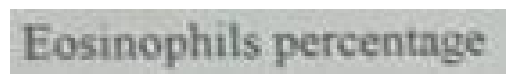

Please enter the text for this image 358:  EOSINOPLILIS PERCENTAGE


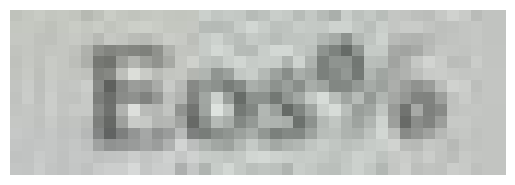

Please enter the text for this image 359:  EOS%


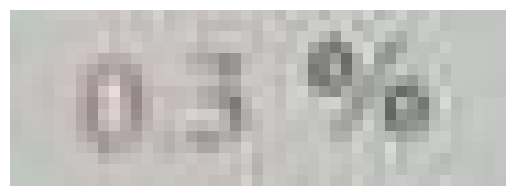

Please enter the text for this image 360:  NONE


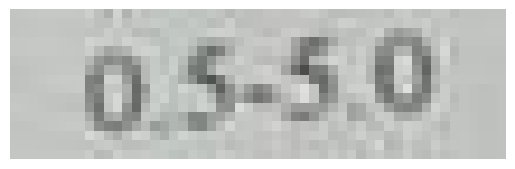

Please enter the text for this image 361:  0.5-5.0


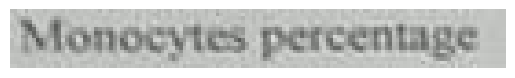

Please enter the text for this image 362:  MONOCYTES PERCENTAGE


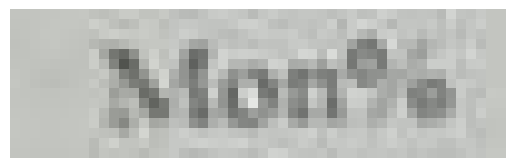

Please enter the text for this image 363:  MON%


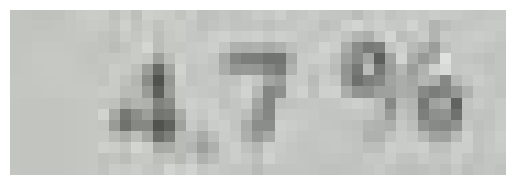

Please enter the text for this image 364:  4.7%


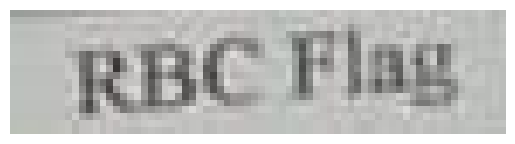

Please enter the text for this image 365:  RBC FLAG


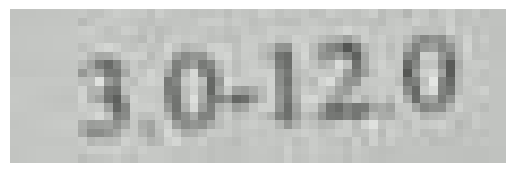

Please enter the text for this image 366:  3.0-12.0


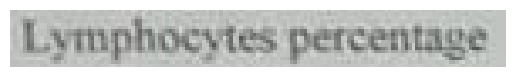

Please enter the text for this image 367:  LYMPHOCYTES PERCENTAGE


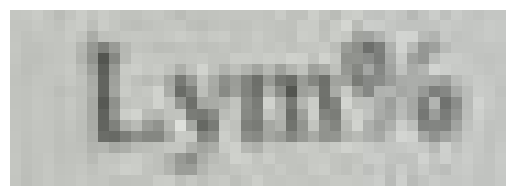

Please enter the text for this image 368:  LYM%


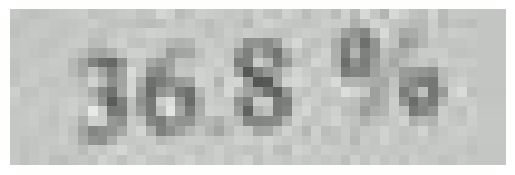

Please enter the text for this image 369:  36.8%


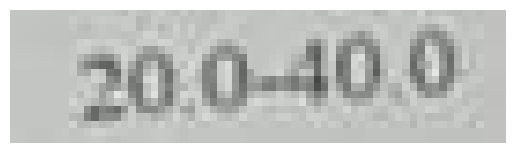

Please enter the text for this image 370:  20.0-40.0


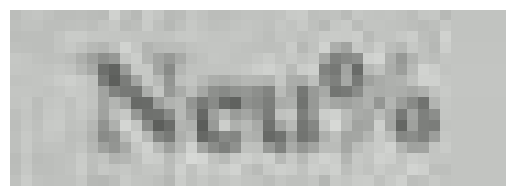

Please enter the text for this image 371:  NONE


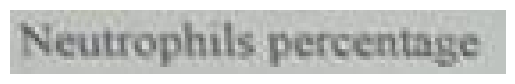

Please enter the text for this image 372:  NEUTROPHILS PERCENTAGE


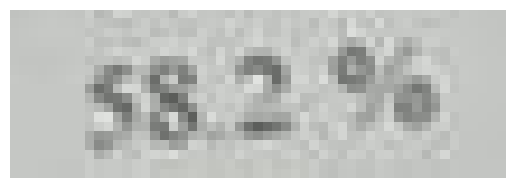

Please enter the text for this image 373:  58.2%


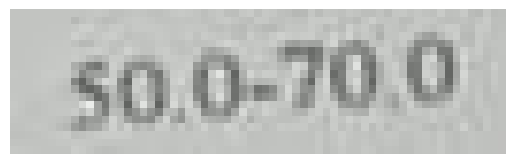

Please enter the text for this image 374:  50.0-70.0


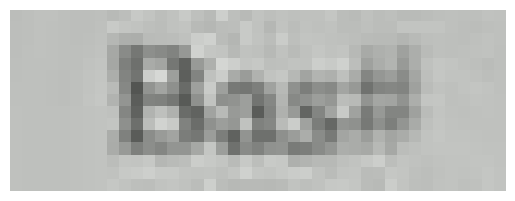

Please enter the text for this image 375:  NONE


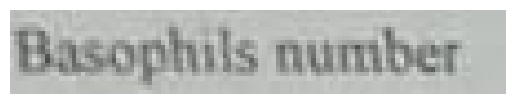

Please enter the text for this image 376:  BASOPHILS NUMBER


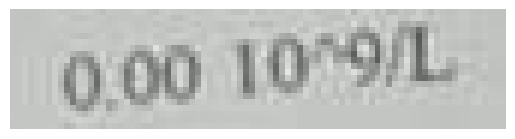

Please enter the text for this image 377:  NONE


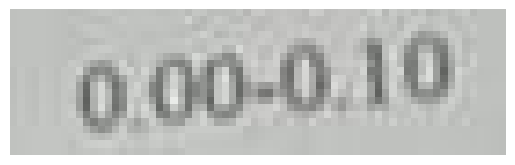

Please enter the text for this image 378:  0.00-0.10


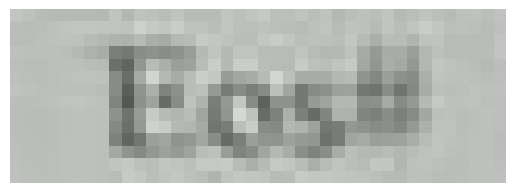

Please enter the text for this image 379:  NONE


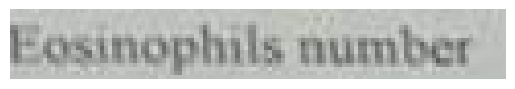

Please enter the text for this image 380:  EOSINOPHILS NUMBER


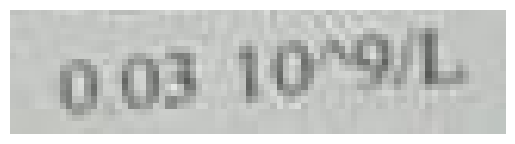

Please enter the text for this image 381:  NONE


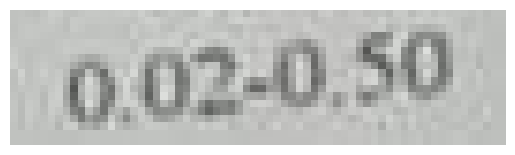

Please enter the text for this image 382:  0.02-0.50


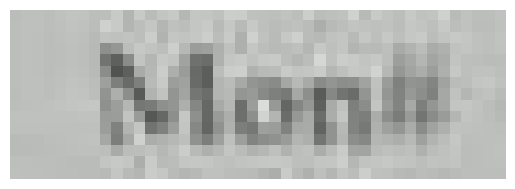

Please enter the text for this image 383:  NONE


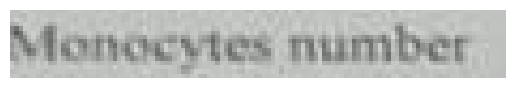

Please enter the text for this image 384:  MONOCYTES NUMBER


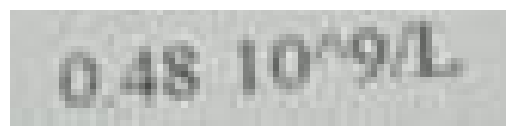

Please enter the text for this image 385:  NONE


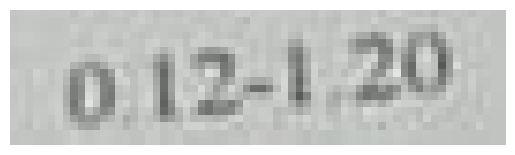

Please enter the text for this image 386:  0.12-1.20


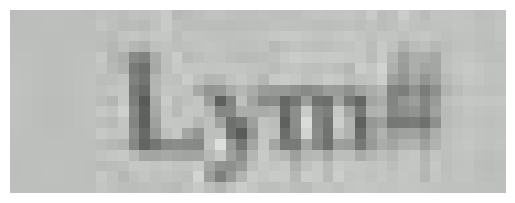

Please enter the text for this image 387:  NONE


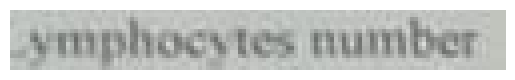

Please enter the text for this image 388:  YMPHOCYTES NUMBER


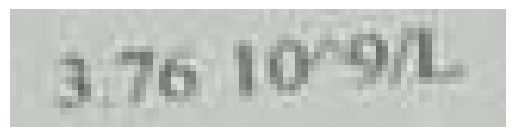

Please enter the text for this image 389:  3.76 10^9 / L


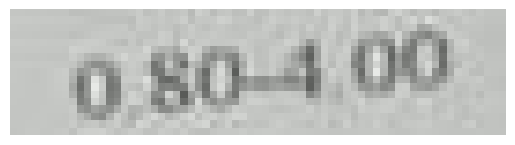

Please enter the text for this image 390:  0.80 - 4.00


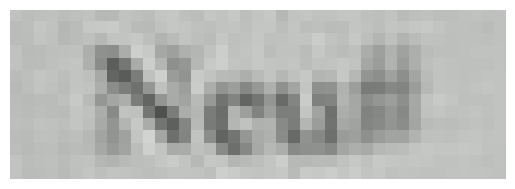

Please enter the text for this image 391:  NONE


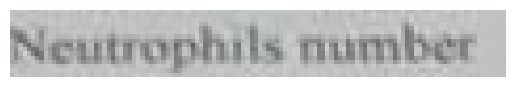

Please enter the text for this image 392:  NEUTROPHILS NUMBER


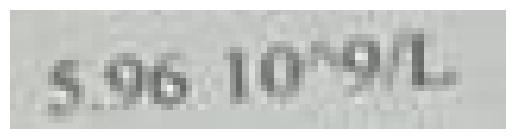

Please enter the text for this image 393:  NONE


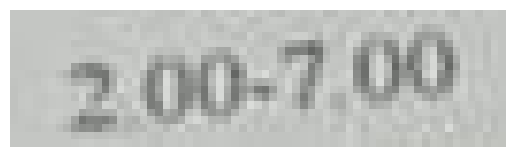

Please enter the text for this image 394:  2.00-7.00


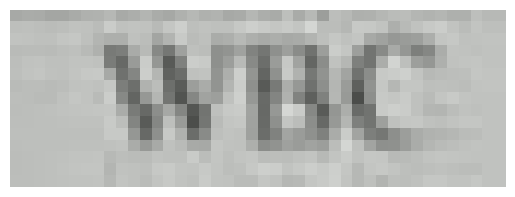

Please enter the text for this image 395:  WBC


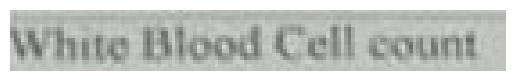

Please enter the text for this image 396:  WHITE BLOOD CELL COUNT


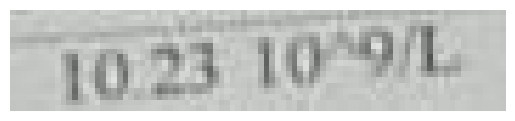

Please enter the text for this image 397:  NONE


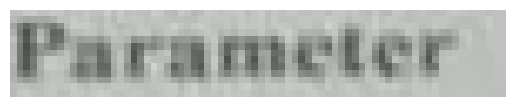

Please enter the text for this image 398:  PARAMETER


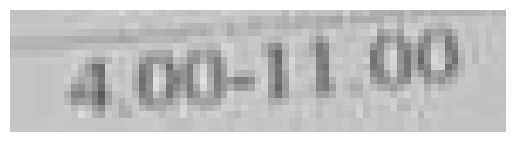

Please enter the text for this image 399:  4.00-11.00


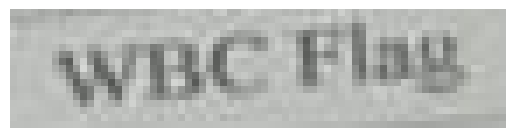

Please enter the text for this image 400:  WBC FLAG


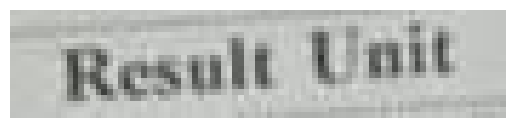

Please enter the text for this image 401:  RESULT LIMIT


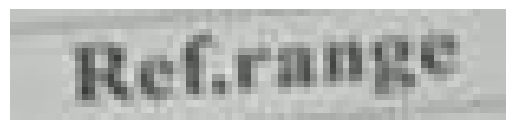

Please enter the text for this image 402:  REF. RANGE


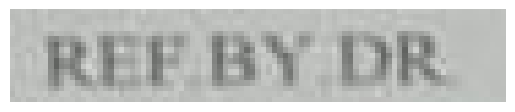

Please enter the text for this image 403:  REF BY DR.


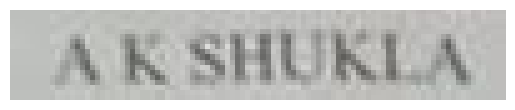

Please enter the text for this image 404:  A K SHUKLA


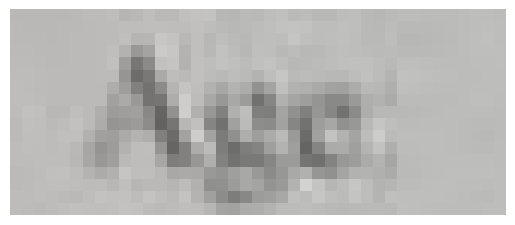

Please enter the text for this image 405:  AGE


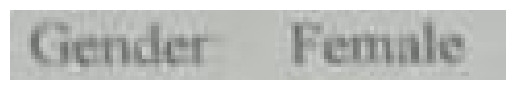

Please enter the text for this image 406:  GENDER FEMALE


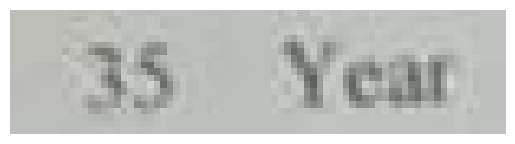

Please enter the text for this image 407:  35 YEAR


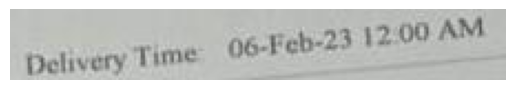

Please enter the text for this image 408:  DELIVERY TIME 06-FEB-23 1200 AM


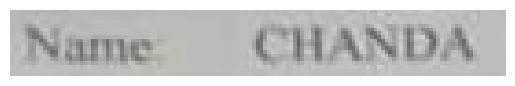

Please enter the text for this image 409:  NAME CHANDRA


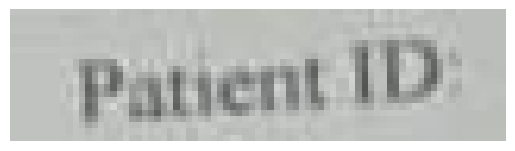

Please enter the text for this image 410:  PATIENT ID


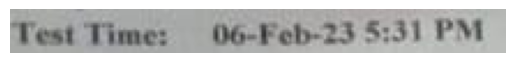

Please enter the text for this image 411:  TEST TIME: 06-FEB-23 5:31 PM


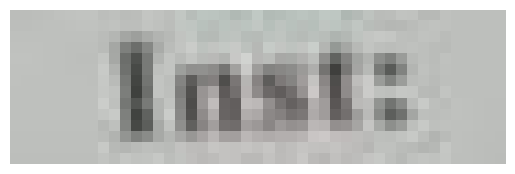

Please enter the text for this image 412:  NONE


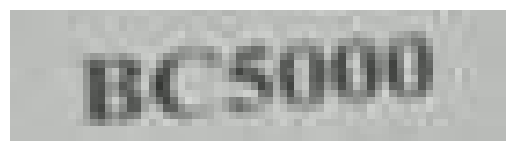

Please enter the text for this image 413:  BC5000


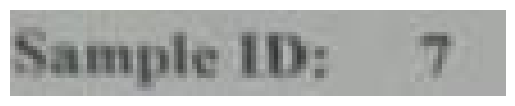

Please enter the text for this image 414:  SAMPLE ID : 7


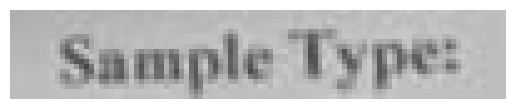

Please enter the text for this image 415:  SAMPLE TYPE:


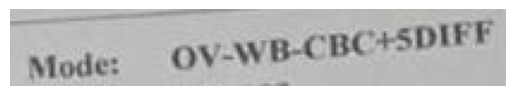

Please enter the text for this image 416:  NONE


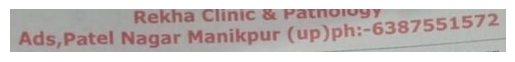

Please enter the text for this image 417:  ADS, PATEL NAGAR MANIKPUR (UP)PH:-6387551572


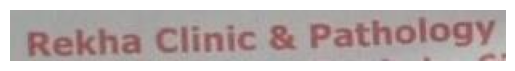

Please enter the text for this image 418:  REKHA CLINIC & PATHOLOGY


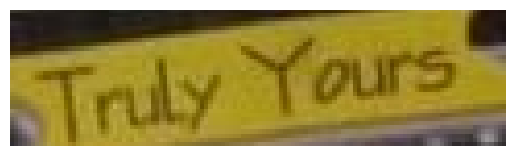

Please enter the text for this image 419:  TRULY YOURS


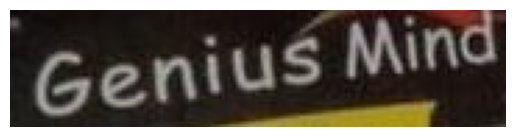

Please enter the text for this image 420:  GENIUS MIND


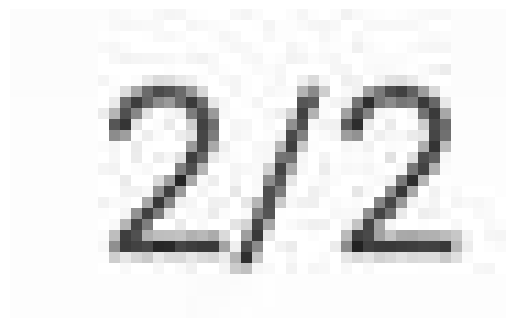

Please enter the text for this image 421:  2/2


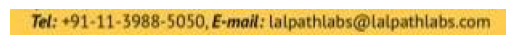

Please enter the text for this image 422:  NONE


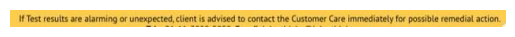

Please enter the text for this image 423:  NONE


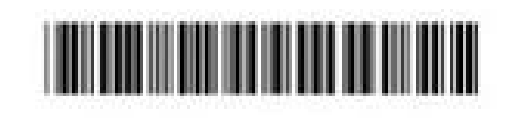

Please enter the text for this image 424:  NONE


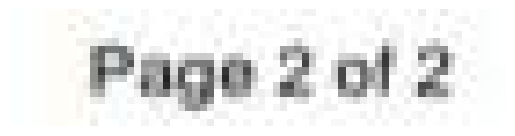

Please enter the text for this image 425:  PAGE 2 OF 2


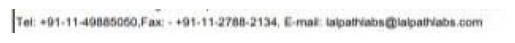

Please enter the text for this image 426:  NONE


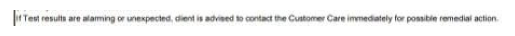

Please enter the text for this image 427:  NONE


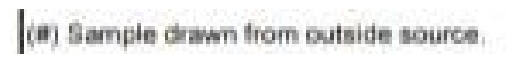

Please enter the text for this image 428:  NONE


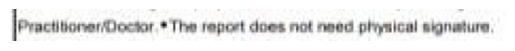

Please enter the text for this image 429:  NONE


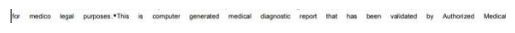

Please enter the text for this image 430:  NONE


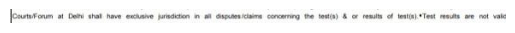

Please enter the text for this image 431:  NONE


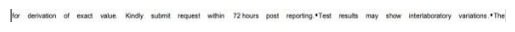

Please enter the text for this image 432:  NONE


Please enter the text for this image 433:  NONE


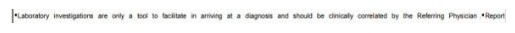

Please enter the text for this image 434:  NONE


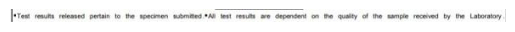

Please enter the text for this image 435:  NONE


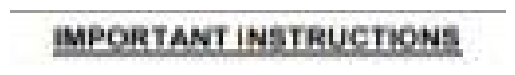

Please enter the text for this image 436:  IMPORTANT INSTRUCTIONS


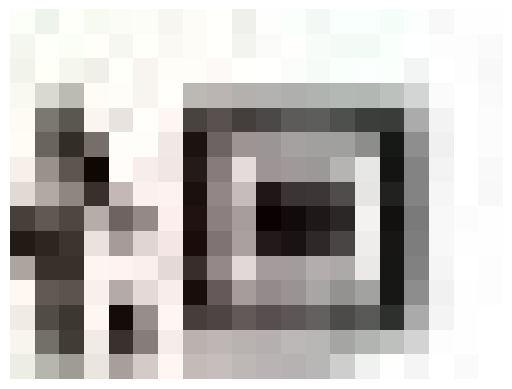

Please enter the text for this image 437:  NONE


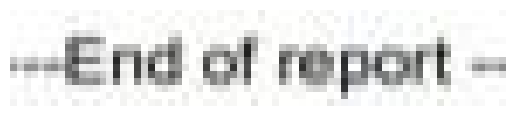

Please enter the text for this image 438:  END OF REPORT


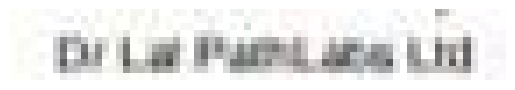

Please enter the text for this image 439:  NONE


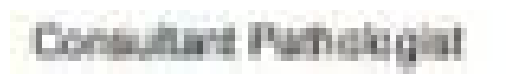

Please enter the text for this image 440:  NONE


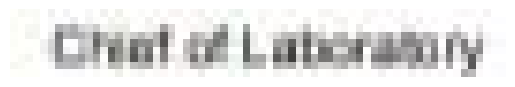

Please enter the text for this image 441:  NONE


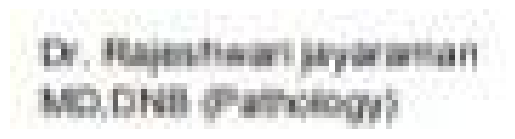

Please enter the text for this image 442:  NONE


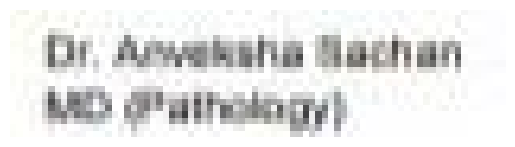

Please enter the text for this image 443:  NONE


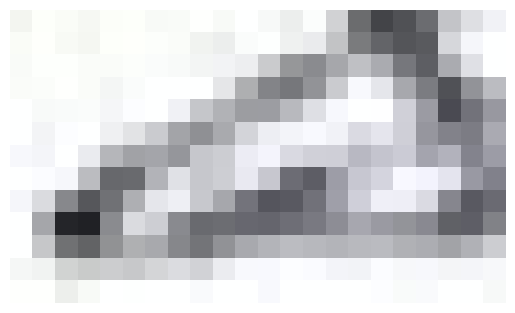

Please enter the text for this image 444:  NONE


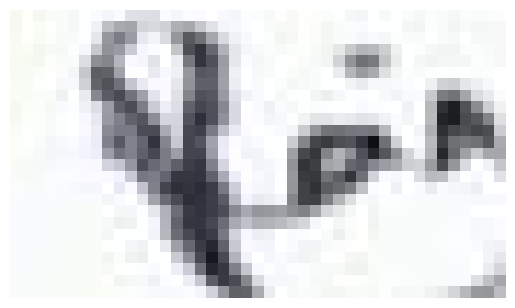

Please enter the text for this image 445:  NONE


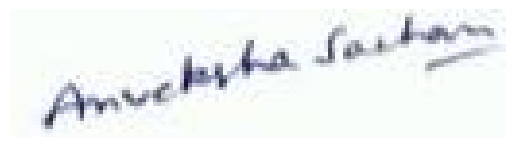

Please enter the text for this image 446:  NONE


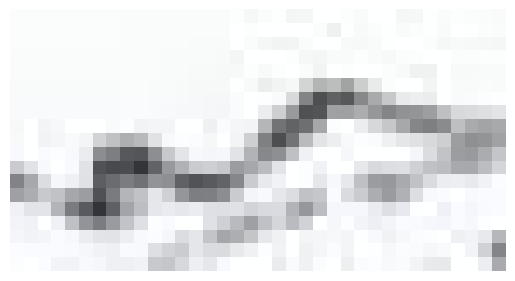

Please enter the text for this image 447:  NONE


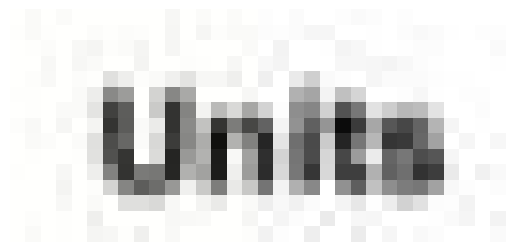

Please enter the text for this image 448:  NONE


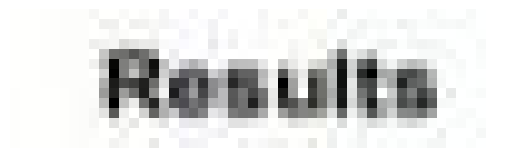

Please enter the text for this image 449:  RESULTS


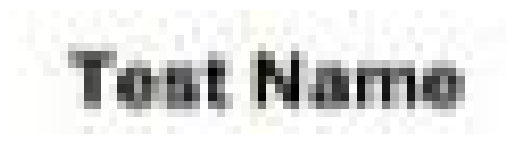

Please enter the text for this image 450:  TEST NAME


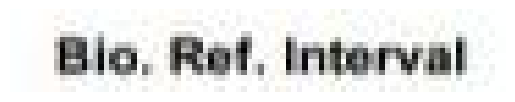

Please enter the text for this image 451:  BIO. REF. INTERVAL


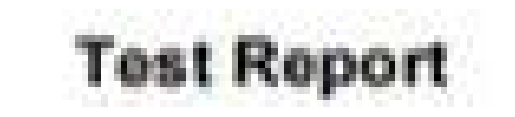

Please enter the text for this image 452:  TEST REPORT


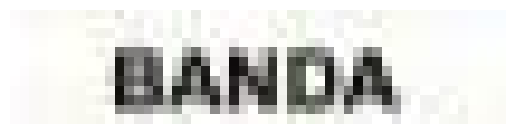

Please enter the text for this image 453:  BANDA


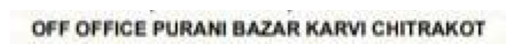

Please enter the text for this image 454:  OFF OFFICE PURANI BAZAR KARVI CHITRAKOT


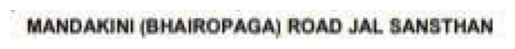

Please enter the text for this image 455:  MANDAKINI(BHAIROPAGA) ROAD JAL SANSTHAN


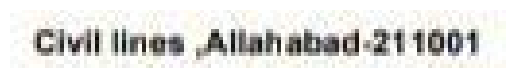

Please enter the text for this image 456:  CIVIL LINES, ALLAHABAD-211001


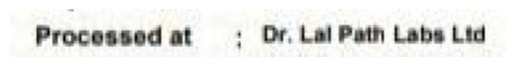

Please enter the text for this image 457:  PROCESSED AT: DR. LAL PATH LABS LTD


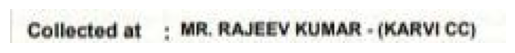

Please enter the text for this image 458:  COLLECTED AT: MR. RAJEEV KUMAR - (KARVI CC)


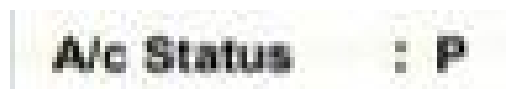

Please enter the text for this image 459:  A/C STATUS: P


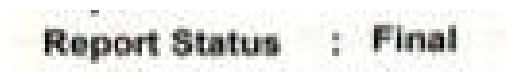

Please enter the text for this image 460:  REPORT STATUS : FINAL


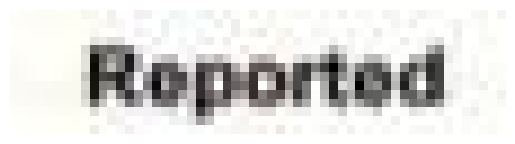

Please enter the text for this image 461:  REPORTED


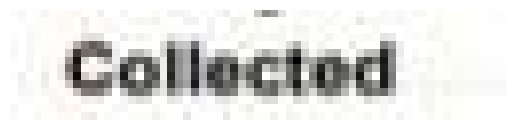

Please enter the text for this image 462:  COLLECTED


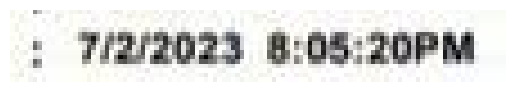

Please enter the text for this image 463:  : 2/2/2023 8:05: 20 PM


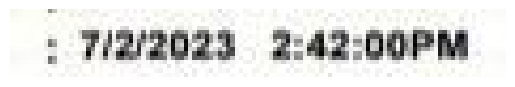

Please enter the text for this image 464:  : 7/2/2023 2:42:00 PM


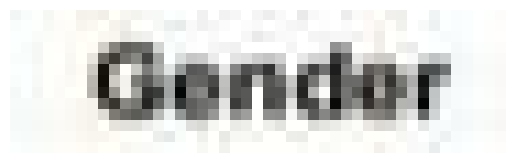

Please enter the text for this image 465:  GENDER


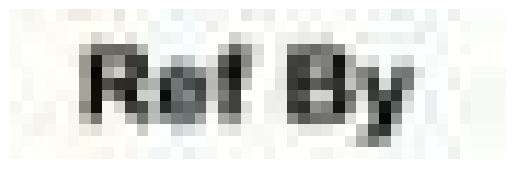

Please enter the text for this image 466:  REF BY


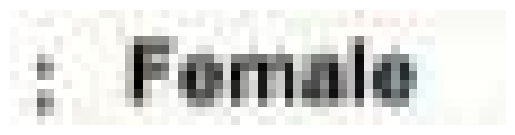

Please enter the text for this image 467:  : FEMALE


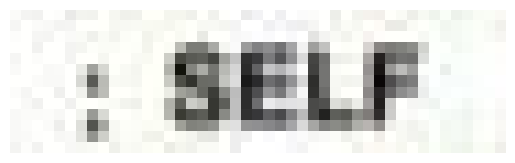

Please enter the text for this image 468:  : SELF


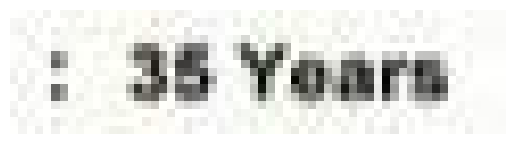

Please enter the text for this image 469:  : 35 YEARS


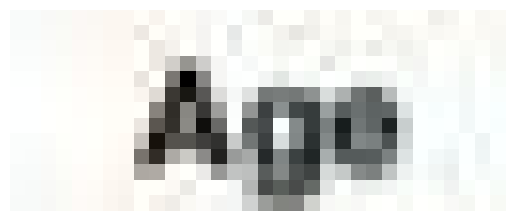

Please enter the text for this image 470:  AGE


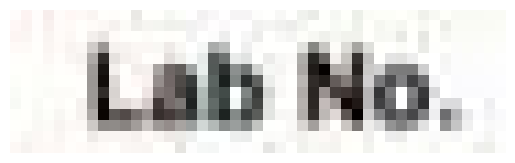

Please enter the text for this image 471:  LAB NO.


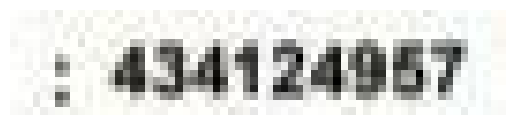

Please enter the text for this image 472:  : 434124957


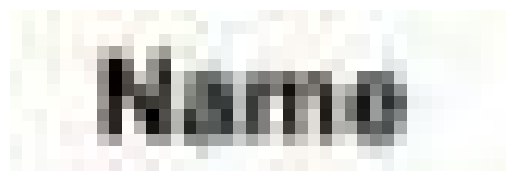

Please enter the text for this image 473:  NAME


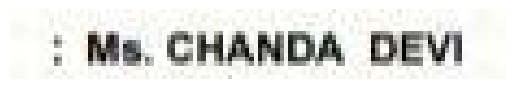

Please enter the text for this image 474:  : MS. CHANDA DEVI


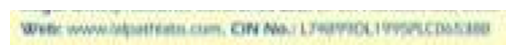

Please enter the text for this image 475:  NONE


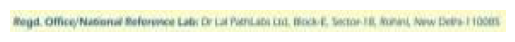

Please enter the text for this image 476:  NONE


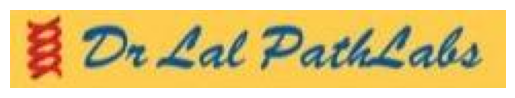

Please enter the text for this image 477:  DR LAL PATHLABS


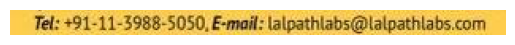

Please enter the text for this image 478:  NONE


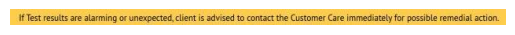

Please enter the text for this image 479:  NONE


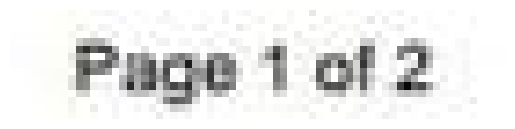

Please enter the text for this image 480:  PAGE 1 OF 2


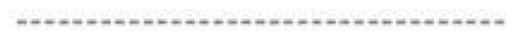

Please enter the text for this image 481:  NONE


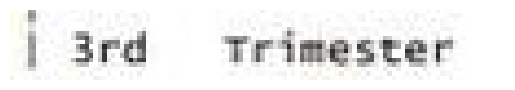

Please enter the text for this image 482:  3RD TRIMESTER


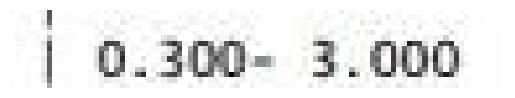

Please enter the text for this image 483:  NONNE


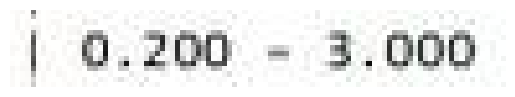

Please enter the text for this image 484:  NONE


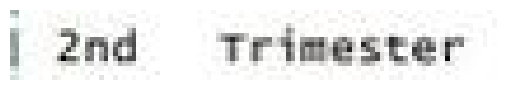

Please enter the text for this image 485:  2ND TRIMESTER


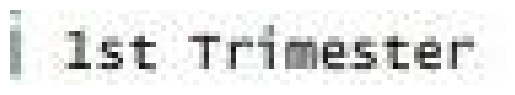

Please enter the text for this image 486:  1ST TRIMESTER


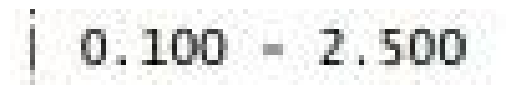

Please enter the text for this image 487:  NONE


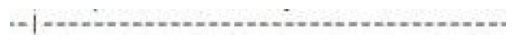

Please enter the text for this image 488:  NONE


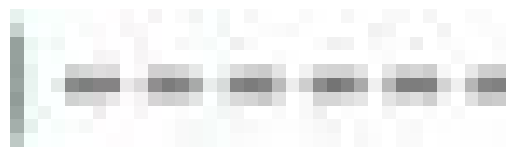

Please enter the text for this image 489:  NONE


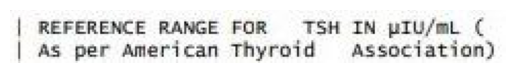

Please enter the text for this image 490:  NONE


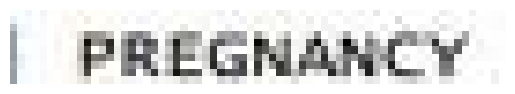

Please enter the text for this image 491:  PREGNANCY


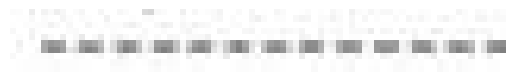

Please enter the text for this image 492:  NONE


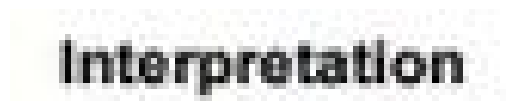

Please enter the text for this image 493:  INTERPRETATION


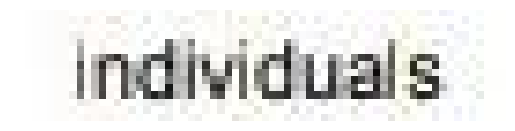

Please enter the text for this image 494:  INDIVIDUALS


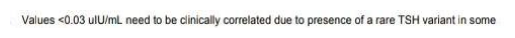

Please enter the text for this image 495:  NONE


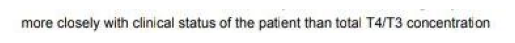

Please enter the text for this image 496:  NOE


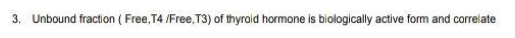

Please enter the text for this image 497:  NONE


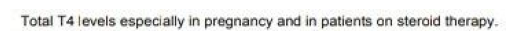

Please enter the text for this image 498:  NONE


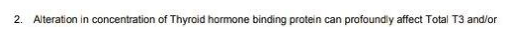

Please enter the text for this image 499:  NONE


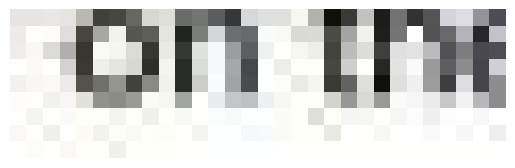

Please enter the text for this image 500:  NONE


In [27]:
import pandas as pd
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
import requests
import matplotlib.pyplot as plt

for i, row in df.iterrows():
    img_path = row['img_path']
    image = Image.open(img_path).convert("RGB")
    
    # Display the image using matplotlib
    plt.imshow(image)
    plt.axis('off')
    plt.show()

    input_text = input(f"Please enter the text for this image {i}: ")

    df.at[i, 'actual_text'] = input_text


In [29]:
df

img_path  \
0     Cropped_images_ocr1/cropped_image_1.jpg   
1     Cropped_images_ocr1/cropped_image_2.jpg   
2     Cropped_images_ocr1/cropped_image_3.jpg   
3     Cropped_images_ocr1/cropped_image_4.jpg   
4     Cropped_images_ocr1/cropped_image_5.jpg   
..                                        ...   
496  Cropped_images_ocr7/cropped_image_76.jpg   
497  Cropped_images_ocr7/cropped_image_77.jpg   
498  Cropped_images_ocr7/cropped_image_78.jpg   
499  Cropped_images_ocr7/cropped_image_79.jpg   
500  Cropped_images_ocr7/cropped_image_80.jpg   

                                                  text  \
0                                                LABLE   
1                                         PATROTING IN   
2                          : S. WIDAL TEST IS POSITIVE   
3                                               RESULT   
4                             : AGGLUTINATION NOT SEEN   
..                                                 ...   
496  MORE CLOSELY WITH CHINICAL STATUS OF THE PATIE...   
497          3. UNBOUND FRACTION (FREE,T4 /FREE,T3) OF   
498  TOTAL T4 LEVELS ESPECIATIVE IN PREGNANCY AND I...   
499    2. ATERATION IN CONCENTRATION OF THYOID HOMMONE   
500                                             ON THE   

                     actual_text  
0                          LabTe  
1                      Pathology  
2    : S. WIDAL TEST IS POSITIVE  
3                         Result  
4       : AGGLUTINATION NOT SEEN  
..                           ...  
496                          NOE  
497                         NONE  
498                         NONE  
499                         NONE  
500                         NONE  

[501 rows x 3 columns]

In [31]:
df.to_csv('/kaggle/working/output.csv', index=False)

In [13]:
cer_df = pd.read_csv('/kaggle/input/cer-dataset/output.csv')
cer_df.head()

img_path                         text  \
0  Cropped_images_ocr1/cropped_image_1.jpg                        LABLE   
1  Cropped_images_ocr1/cropped_image_2.jpg                 PATROTING IN   
2  Cropped_images_ocr1/cropped_image_3.jpg  : S. WIDAL TEST IS POSITIVE   
3  Cropped_images_ocr1/cropped_image_4.jpg                       RESULT   
4  Cropped_images_ocr1/cropped_image_5.jpg     : AGGLUTINATION NOT SEEN   

                   actual_text  
0                        LabTe  
1                    Pathology  
2  : S. WIDAL TEST IS POSITIVE  
3                       Result  
4     : AGGLUTINATION NOT SEEN

In [14]:
cer_df_filtered = cer_df[cer_df['actual_text'] != 'NONE']

In [18]:
def character_error_rate(actual, predicted):
    return editdistance.eval(actual, predicted) / max(len(actual), len(predicted), 1)

In [19]:
cers = []
for index, row in cer_df_filtered.iterrows():
    actual = row['actual_text']
    predicted = row['text']
    cer = character_error_rate(actual, predicted)
    cers.append(cer)

# Average CER calculation
average_cer = sum(cers) / len(cers)
print(f'Average CER: {average_cer:.4f}')

Average CER: 0.0909
